# Experiment 1: Sentiment Classification
## Source Task: Twitter
## Target Task: Amazon

In [1]:
from flair.models.text_classification_model import TARSClassifier
from flair.data import Sentence
import pandas as pd 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# GRAKA auswählen
import flair, torch
flair.device = torch.device('cuda:0') 

# Labelbezeichner: Oneword

In [3]:
base_path = '/vol/fob-vol7/nebenf19/samahakk'
#base_path = !pwd
base_path = base_path + '/masterarbeit_experiment2'

In [4]:
# 1. Load Testset
dt = pd.read_csv(base_path + '/sentiment_amazon/oneword/dev.csv')
labels = dt['label']
text = dt['text']

# 2. Load Model
tars = TARSClassifier.load(base_path + '/sentiment_twitter/model/best-model.pt')

# 3. Run Test
results = []
classes = ['awful', 'bad', 'neutral', 'good', 'great']

for sentence in text:
       sequence = Sentence(sentence)

       tars.predict_zero_shot(sequence, classes, multi_label = False)
       print(sequence)
       label = sequence.labels[0].value
       results.append(label)
       print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average='weighted')

2021-09-08 15:18:49,196 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/sentiment_twitter/model/best-model.pt
init TARS
Sentence: "My mistake for not spotting the word , " flavored ," but this is really awful ! I was expecting Blue Mountain coffee and instead got this foul tasting coffee-like brew that has no coffee taste at all . Is it hazelnut ? I hope not - I have nut allergies . Whatever it is , it overpowers any weak coffee flavor that may have been present at the beginning !< br />< br /> Checking the ingredients on the package , we learn that it includes Arabica coffee and " natural and / or artificial flavors . " Digging around the Wolfgang Puck website , we first learn that it 's " Light flavored coffee with the essence of the islands ( Flavored )" and finally , " Coconut Infusion Flavored Coffee. "< br />< br /> I never would have guessed coconut ."   [− Tokens: 145  − Sentence-Labels: {'label': [bad (0.8917)]}]
bad
Sentence: "These were the worst almond

Sentence: "It is not sweet enough for me . It does not dissolve easily . The packets are prone to leaking . Possible insect infestation ."   [− Tokens: 25  − Sentence-Labels: {'label': [awful (0.8382)]}]
awful
Sentence: "I would never buy flavored coffee of this kine any more . The coffee itself tastes awful . The flavor is very artificial . Now I figured that no company will use high quality beans to make flavored coffee . Just like Jasmine tea is made of worse quality tea leaves because it is just for flavor . I am done with flavored coffee ."   [− Tokens: 65  − Sentence-Labels: {'label': [awful (0.7654)]}]
awful
Sentence: "The ingredients listed for this product prominently include wheat flour . Foods that contain wheat flour are never gluten free . People with celiac disease will definitely get the owie tummy if they eat this. < br />< br /> CONTAINS WHEAT . NOT GLUTEN FREE !"   [− Tokens: 47  − Sentence-Labels: {'label': [awful (0.7991)]}]
awful
Sentence: "It sure would be nice if

Sentence: "I threw it away . It tasted bad . It was bitter and tasted wierd . Maybe I got a bad batch or something ."   [− Tokens: 25  − Sentence-Labels: {'label': [awful (0.9041)]}]
awful
Sentence: "This is garbage . If you : Think Wonder bread is good bread and Diet Soda actually tastes better than regular then you may like his chemically tasting garbage . My mouth and tongue actually violently rejected my ability to swallow this poison . As an aside , Freschetta recently came out with their version and believe it or not it is VERY TASTY !"   [− Tokens: 65  − Sentence-Labels: {'label': [awful (0.8684)]}]
awful
Sentence: "The cracker tests good and kids like it . The reason for 1 star is the shippment problem . I received only 1 box ( 6 1-oz bags ) instead of 6 boxes ( 36 bags ) as it described in the produce features :< br />< br />" Case of six boxes , each containing six 1-ounce packages ( total of 36 snack-size packages , 36 ounces )"< br />< br /> I received the replacement shipg

Sentence: "I ordered this product and it came later than any of the other items I purchased around the same time . A week later . I ordered before Christmas and did not receive the product until the very end of December. < br /> I just now was able to start using the " soapwort " a week ago . Otherwise , I would have had this review up a lot sooner. < br /> There was absolutely no sudsing from these roots . They just made my creation smell like musty dirt , but gave no amount of sudsing. < br /> I tried to rub a few root pieces in my hand with water to see if there would be sudsing , and no . I tried soaking the roots overnight in cold water and looked for suds in the morning - none . I boiled the water , added the roots and steeped overnight . Nothing. < br /> This was a huge rip-off . This was my first purchase from this company , Kismet Kreations . I wish I had purchased things before and had good results so I had something better to say , but this is what I 've gotten on my first p

Sentence: "You get a good number of the treats , even thought they are still pricey . They are very soft , and quite a few were pretty squished , though the treats are soft enough you could likely mold them around the pill if need be I suppose . As for the cat ... he gobbled up the empty ones in seconds . He eagerly gobbled up the one with the pill as well , only as soon as he bit into it and discovered the pill , and out onto the floor it went . He did like the treat enough to lick the treat off a bit though , leaving the soggy pill behind . Another empty he ate slightly hesitantly , and for a wonder the next with a pill actually went down the way it was supposed to . Yay ! I thought , no more struggling with pills . The next time though , he bit into the treat and found the pill again . In fact , he 'd deliberately nibble at it , uncovering the pill . After that , when I tried again , he started to refuse the treats at all , even without a pill . In fact , he 'd gotten so distrustful

Sentence: "I would n't buy this product again as it 's too hard to open and insert the treats . It says to put your finger in and twist to open . I gave it to my niece to open and she even had trouble ."   [− Tokens: 45  − Sentence-Labels: {'label': [awful (0.7257)]}]
awful
Sentence: "I 'd like to be able to review this product - however , San Francisco Coffee did not include it in my shipment . Although noted on the invoice , along with the French Roast ordered , they sent two boxes of French Roast and did not correct the shipment when notified . Therefore , one star it is !< br /> BTW - the French Roast is a 4 star ."   [− Tokens: 72  − Sentence-Labels: {'label': [awful (0.7354)]}]
awful
Sentence: "I have purchased this product from local stores and have purchase the fries from amazon . These chips that were delivered are rancid . I ca n't even stand the smell myself . It now is in my trash can ! DO NOT BUY THIS PRODUCT FROM AMAZON ."   [− Tokens: 49  − Sentence-Labels: {'label': [aw

Sentence: "Bahlsen Delice Cookies , 3.5-Ounce Boxes ( Pack of 12 )< br /> Very Disappointed with your service and deceptive listing of the product ingredients . i am allergic eggs and as per your listing , there is NO mention of eggs and when i received the product , on the box the cookies one of the ingredient is EGG ."   [− Tokens: 61  − Sentence-Labels: {'label': [awful (0.826)]}]
awful
Sentence: "Note that the cost is for only ONE bottle ( not 2 ) . Why show 2 bottles in the picture . And no where on the description do they state clearly that the price is for only 1 bottle ."   [− Tokens: 41  − Sentence-Labels: {'label': [awful (0.755)]}]
awful
Sentence: "Gold Prince has made a terrible mistake . There are two products . COLDAID and FLUAID . THey are different formulary . Unfortunately they display Fluaid picture on the Amazon website and their own website but the words are COLDAID . THere is a separate product for Coldaid . Regardless -- if you order the FLUAID on AMAZON you will 

Sentence: "I almost bought this for my cat i have been looking for a item like this at local stores so i placed the order and was reviewing everything i also bought several other items so did not think anything of the total until i looked at the invoice for this particular item the toy cost a 1.99 but they get you with shipping it was 6.55 bringing the total to 8.54 . i thought it was overpriced and cancelled my order i guess it is buyer beware !!!! !"   [− Tokens: 89  − Sentence-Labels: {'label': [awful (0.8027)]}]
awful
Sentence: "I bought Twizzlers Cherry Pull-n-Peel on an impulse while shopping in a discount store . Stupid me , I did n't realize that all Twizzlers are not created equally. < br />< br /> The first bite was OK . Then , I got this overwhelming feeling that I was consuming chewy cough medicine . I know it 's candy -- but this was soooo outrageously artificial and medicinal tasting that I wanted to gag. < br />< br /> Blech . Live and learn . Next time , I 'll stick wit

Sentence: "My pup solved this within minutes . Now it 's useless - hardly " interactive . " He just pops the treats out , and it 's over . The search ( quest ?) for the perfect interactive toy ( for a super smart pup who bores easily ) continues ... ."   [− Tokens: 52  − Sentence-Labels: {'label': [awful (0.7729)]}]
awful
Sentence: "I have used this product for years and have been generally satisfied with it . However , out of the last five containers I have purchased only one has produced grass as expected.It was from Pet Smart dated 2009 . They were purchased from Pet Smart ( 2 ) , Pet Supermarket ( 2 ) and Amazon ( 1 ) . Only one from Pet Smart was usable last year and the other four were purchased after that container , the last from Amazon . All except the ( 2 ) from Pet Smart were dated 5 / 2011. < br /> I recently sent a letter to Gimborn detailing my experience , with pictures of the failed containers . They contacted my by phone and said their customer service rep is on vacati

Sentence: "Why is this cereal $ 16 a box ?? ? Is there something I 'm missing ? I know prices have been rising , but not THIS much. ."   [− Tokens: 29  − Sentence-Labels: {'label': [awful (0.8966)]}]
awful
Sentence: "Roughly 1 / 2 of the kcups in the box I received have little ( a speck ) of coffee or none at all in them . It is noticeable when picking it up and I cut into a few to see for myself . Was excited to try the product but disappointed to end up with only around 20 usable cups out of the 36 unit box ."   [− Tokens: 69  − Sentence-Labels: {'label': [awful (0.8409)]}]
awful
Sentence: "My baby enjoyed this flavor when I purchased it at a store . I ordered a case of it from Amazon . the whole case arrived moldy . Each jar popped when I opened it too , showing that it was properly sealed . I contacted Earth 's Best . They said they would look into it but would not follow up with me . Given what is going on in our food industry , I will not purchase any more products from this comp

Sentence: "My son and I who are both Celiacs loved Glutino wafers in both chocolate and dark chocolate varieties . We were on our 3rd box when I opened one of the bars and went to bite into it . It was the equivalent to biting into some sort of spongy rock . I immediately spit out what chocolate had fallen into my mouth while biting it . The bar itself seemed extremely stale to me . I went ahead and opened the remaining 3 bars in the box and the rest were normal . I also noted on the package that the product is made in Israel then processed in Canada , then sent to USA to be bought . It seems to me like one of the bars I had floated around a facility for quite some time before it was actually packaged and sent . Or worse who knows . I 'm glad it was me and not my 3 year old son who bit into it. < br />< br /> I tried contacting Glutino about what happened . I tried calling several times as well as sent messages via the internet . But no response . It went from being suspicious to down 

Sentence: "Just when you think you 're eating healthier - you research to find out " Your NOT " with Clif Products . Theirs so much sugar , carbs & fats in these products that you might as well eat cookies or candy bars . They definitely taste better and you get the same sugar & calories ."   [− Tokens: 57  − Sentence-Labels: {'label': [good (0.865)]}]
good
Sentence: "Tried this exact brand of Stevia today and I had to toss out my cup of coffee , it totally changed the taste and also had an awful " bitter " after taste . YUK ....!!! !"   [− Tokens: 37  − Sentence-Labels: {'label': [awful (0.9002)]}]
awful
Sentence: "I purchased 2 other types of Blue Diamond almonds on the same day , and they were both around $ 11 for a pack of 3 . T his one was only ONE 8 oz. container , and I assumed it was at least 2-3 containers since the cost was over $ 8 ."   [− Tokens: 54  − Sentence-Labels: {'label': [neutral (0.8047)]}]
neutral
Sentence: "I should have realized why there was no ingredient infor

Sentence: "WARNING !!!! ! they do n't even make there own food it is licensed out to another company if you look on the back of the bag it does n't even list who it is made by it only says guaranteed by canidae and when i asked who it was made by i was < br />< br /> 1 either completely ignored < br />< br /> 2 given a huge run around only thing i ever got was a state it was made in they would n't even tell me the company < br />< br /> this is dangerous because this is how all the pet food recalls happened a few years ago by out sourcing manufacturing"   [− Tokens: 120  − Sentence-Labels: {'label': [awful (0.5097)]}]
awful
Sentence: "I love Cheerios Oat Cluster Crunch and I hardly ever see it at any stores anymore . So I was really excited to find it on Amazon . But when I received my order the cereal was expired . My order was in March 2012 and the cereal expired September 2011 . I wo n't be ordering any more cereal from Amazon ."   [− Tokens: 63  − Sentence-Labels: {'label': [good (

Sentence: "A the salt on the outside has broken off before packaging and the pretzels are hard enough to break a filling . They do have a good taste though ."   [− Tokens: 30  − Sentence-Labels: {'label': [awful (0.8441)]}]
awful
Sentence: "I FELT NO REAL EFFECT FROM THIS PRODUCT . IF YOU WANT TO USE IT , YOU COULD TAKE THE VITAMINS , AMINO ACIDS AND CAFFEINE IN TABLES FOR A SMALL FRACTION OF THE PRICE . OF COURSE , ANYTHING IS BETTER THAN COFFEE . I NEVER DRINK COFFEE ."   [− Tokens: 50  − Sentence-Labels: {'label': [awful (0.602)]}]
awful
Sentence: "Half alcohol - half extract . It would have been nice if the seller had stated the ingredients in the web information ."   [− Tokens: 23  − Sentence-Labels: {'label': [awful (0.8849)]}]
awful
Sentence: "I had never tried Pomegranate before so I just gave this a shot and it 's nasty stuff. < br /> If you do n't like the tartness of a grapefruit ( I do n't ) , then this is n't for you . About as tart as I can go is an orange and this is abo

Sentence: "I order this for my brother-in - law as he likes this coffee but the shipping on it was very slow it took longer than I thought it would ."   [− Tokens: 30  − Sentence-Labels: {'label': [awful (0.7929)]}]
awful
Sentence: "Walkers Products . Their shortbread line is wonderful . But the Highland Oatcakes ... really , really dry . And there is no compensation for the dryness ... like taste . Thought I was trying a new thing based on the Walkers brand . Guess I 'll stick with what I know ... the shortbread. < br />< br /> Walkers Highland Oatcakes are nothing to write home about . I would n't recommend them to anyone ."   [− Tokens: 78  − Sentence-Labels: {'label': [good (0.7213)]}]
good
Sentence: "I paid over $ 10.00 for a single 4 oz container . I was looking to buy bulk , and mistakenly assumed that for ten dollars , I would receive a 4 pk of non pareils . Clearly , I did n't read the product description carefully enough as only one container was received ! I know these are s

Sentence: "Although this did n't taste awful , it really was n't much different < br /> than cinnamon . Not the rich Ethiopian flavor I hoped. < br /> Zamori 's was much more like it ."   [− Tokens: 37  − Sentence-Labels: {'label': [awful (0.7624)]}]
awful
Sentence: "I loved the price . You can find it for $ 2 at most stores . Which is a really solid price for a yeast made by a reputable company . Depending on the literature you read , you 'll find this described as a " belgian-type " yeast . I do n't get that at all . It seems like a very plain , average yeast without any significant character except breadiness and yeastiness. < br />< br /> Other than the price , I do n't like this yeast . I tried it in a cider and a brown ale . It ferments fast and furious and when its done , that 's it . This is a work hard play hard yeast . Mega krausen for maybe 36 hours and then that 's it . The cider went from 1.056 to 1.008 in about 36 hours . The brown ale on the other hand started at about 1

Sentence: "i like buttery popcorn so though i would give this a try . i liked the way the popcorn popped and there were very few unpopped kernels in the pac . although this popcorn looked buttered , as most of the kernels had yellow on them , it did not taste like butter at all . i have nothing against the kernels as they were fluffy , but basically not much on the butter flavor . i was disappointed ."   [− Tokens: 80  − Sentence-Labels: {'label': [awful (0.8318)]}]
awful
Sentence: "I bought two of these directly from AeroGardens . One with the salad greens and one with the tomatoes . I 've had them for 32 days now , and the greens are about 2 " tall and the tomatoes show one tomato plant that is no more than 1 / 4 " high . I called to do an RMA . I have hydronic ( infloor ) heating , set at 64 degrees , which is very uniform and should not have caused my AeroGrows to fail . I checked the pH and TDS and found that they are way out of whack from what they should be for acceptable levels

Sentence: "I 'm not sure exactly why I thought I 'd like this Starbucks Natural Fusions Vanilla Flavored Ground Coffee , since I usually find Starbucks coffee not to my taste . The ground coffee has a nice vanilla smell while it 's still in the bag but my first sip was a huge disappointment -- it tasted decidedly harsh . I tried brewing it stronger and weaker ; still harsh , almost acidic . The only thing that made it drinkable was adding quite a bit of sugar , and I really do n't care for my coffee that way. < br />< br /> The ingredient list claims " ground vanilla beans ," which I would n't expect to have a harsh acidic taste . Vanilla is the second most expensive spice in the world ( after saffron ) and grinding the beans is known to be a good way of dispersing the flavor through hot liquids . How can it have gone so wrong in this product ? Is it the coffee itself that 's so unappetizing , or the combination ? I just do n't know. < br />< br /> From now on I 'll look for vanilla in

Sentence: "As some others have noted , the GoPicnic salmon is like overpriced catfood . Heck , I 've seen Fancy Feast cat food appetizers provide a higher quality of flaky salmon than you 'll find in this GoPicnic snackbox. < br />< br /> First , the good . The edamame dried soybeans provide 30 % of your daily protein intake , which was quite surprising to me . They were slightly on the bland side however , but I felt very nutritious when consuming then . The chocolate square and trail mix were ok ( not great , but passable ) , and tasted fine . Also , the Sudoku game on the bottom of the packaging was a thoughtful touch , although I do n't play Sudoku . Also , the crackers were pretty tasty ; reminded me of a healthier version of Ritz crackers. < br />< br /> Now , the bad . The salmon , which is supposed to be the centerpiece of the meal , was nasty . Did n't taste like salmon at all , since it was overpowered by other spices , but it did have a slightly fishy odor . Had an odd consi

Sentence: "I bought this product from Target after I had done what I thought was enough research on baby food makers . I was originally going to get the baby bullet , but the reviews were not good at all so I went with the brezza instead . Mistake . I remember that a few people had written about the poor quality and bad customer service ( of the company itself , not amazon ) . When I opened it , the tape used to secure it within the plastic bag was melted so there was sticky stuff all over the bottom of the thing . I had to scrub it as soon as I took it out of the box , after it had gotten sticky melted tape all over my kitchen counter . That was annoying . The plastic covering over the buttons looked like it was lifting ( as if it had been used or something ... even though it was brand new ) . I tried the motor and it worked , it was n't terribly loud , I 'd probably rate the noise a 4 on a 1-10 scale . When I went to wash it ( prior to first use of course ) , the directions said to r

Sentence: "Having tried just about every other vegan jerky item on the market I was excited to find one that is completely gluten-based , offering a very reasonable protein-to-calories ratio (~ 10 %) , a reasonable price-per-ounce , plus great reviews to boot . Got the product and discovered to my great chagrin that it requires refrigeration after opening ! ! Not only does that fly in the face of what jerky is supposed to be , it is not disclosed anywhere in the Amazon product description . Ouch ! So much for taking these 4oz packages on the trail , or anywhere else for that matter. < br />< br /> Also , be aware that the product -- unlike several competitive vegan jerky products -- is made in Taiwan which could mean it uses Chinese gluten . That 's a source I personally try to avoid because of significant food safety issues in the past . However , I contacted the manufacturer and was told that their gluten is " imported from either Australia , Western Europe or the USA ...... most all

Sentence: "These were not good at all ... too spicy . Too " limey ".. . the crunch factor was really awful ... felt like my teeth were going to break . ( Love the name ... the chips were AWFUL ! ) Wound up throwing the bag away ."   [− Tokens: 49  − Sentence-Labels: {'label': [awful (0.9194)]}]
awful
Sentence: "Very disappointed with the taste of this product ; it really lacks flavor.In the future i will wait until Schluckwerder Marzipan is back in stock ."   [− Tokens: 26  − Sentence-Labels: {'label': [awful (0.9562)]}]
awful
Sentence: "The coffee is good . However , at least half of these have n't been sealed correctly . When I brew them the edge of the foil pops open and coffee grounds go everywhere . Not fun to clean . It may have just been the batch we got , but I wo n't be ordering these again ."   [− Tokens: 59  − Sentence-Labels: {'label': [awful (0.7227)]}]
awful
Sentence: "What are these K-Cups made of ? $ 1.00 per K-Cup and that is at a discount ? Starbucks came late the the

Sentence: "All Natural Flavor / no artificial color , says the bold letters on the front of the package. < br /> When you read the nutrition label you see there are only 8 grams of sugar compare to the nearly 16 grams in comparable drinks. < br /> No where on the package does it tell you it has artificial sweetner as well as High Fructose Corn Syrup , neither of which is exactly natural , though technically not a flavor. < br /> Since neither the outside box or the inside package tells you the product has Splenda ( the only place you see it is in the ingredients list along with water , citric acid , natural flavor ( not sure where this comes from ) and HFCS . Absolutely no nutrient value )< br /> The advertisement says it is " roaring with fruity flavor " and advertises it as a wholesome drink , but to be honest , this stuff is like drinking sugar with a very artificial cherry flavor going on . It basically tastes like an overly sweet cherry sucker was melted into a little bit of water

Sentence: "Before I get into the meat and potatoes of my review , I 'd like to point out that the front of the packet reads , " Sweet & Salty . " THERE IS NO SALT IN THIS PRODUCT . The ingredients listed are : Popping corn , coconut oil , sugar , beta carotene. < br />< br /> Now , if you make this in your Whirley Pop according to the directions on the back of the packet , the sugar caramelizes . Not only does the sugar caramelize , but the crank is VERY hard to turn once the sugar starts melting ; this makes it very easy , indeed , to break the delicate , plastic crank on your lid . What you ultimately end-up with is sticky , brown popcorn , and a BIG mess to clean out of your pot and off of the lid ( and cleaning that lid is n't exactly what I 'd call " easy ") . My daughter , the Princess of Kettle Corn wrinkled her nose when she saw what it looked like , but being the trooper that she is , she ventured a taste ... and ( drum-roll , please ) she declared , " Nope . That DOES NOT tas

Sentence: "I was really looking forward to trying this tea . I love peach tea and have tried the Iced Southern Sweet tea and the Iced Half & Half tea by Celestial Seasonings and the taste is great .... this one not so much. < br />< br /> Kind of bitter,strange after taste , and not very peachy . I will not purchase this again ."   [− Tokens: 66  − Sentence-Labels: {'label': [awful (0.6425)]}]
awful
Sentence: "This burger is OK . You can do better at a local store . Omaha 's steaks are good. < br /> Buy the steaks ."   [− Tokens: 26  − Sentence-Labels: {'label': [good (0.9114)]}]
good
Sentence: "Sorry I ca n't stand this flavor . It is nasty super sweet somehow . Nasty honey taste . This is the only flavor I ca n't stand ! And I need to bash it for 20 words to ..."   [− Tokens: 40  − Sentence-Labels: {'label': [awful (0.8497)]}]
awful
Sentence: "I bought this gum at Fred Meyer today because it looked good and I 've never seen it before . I usually buy the " Tropical Twist " by Trident 

Sentence: "Having worked in the canned seafood industry , I sampled this product at work for consistency , quality , and taste . It was EXCELLENT back in 2007 . I soon relied on this product for lunch ( with Ritz crackers , Genova Tonno was very , very good ) and also sometimes for snacks . I 'd buy them in bulk here on Amazon at reasonable prices. < br />< br /> Having worked with canned tuna , I can tell you the prices of the " commodity " have gone way up across the board for light tuna ( e.g. skipjack ) and white tuna ( e.g. albacore ) . This is due to increased fishing cost and decreased supply of fish . As sad of an issue as overfishing due to the trawling methods , the reality is we 're seeing this reflected in the cost and quality of various seafood products , most notably via the traditional 6oz cans being downsized to 5oz first by Starkist followed by other shelf stable seafood manufacturers. < br />< br /> So this Genova Tonno product USED TO BE chunks of tuna in extra virgi

Sentence: "I have read some really funny reviews about this product . Some complain that there is noting left in the pod after it has filled the cup , so ' therefore ' it must have been an instant mix ! Brilliant deduction , Sherlock ! What did you expect ... to see choco-grounds in the cup ? Yes , it is no doubt cheaper to go some other route , that 's why 4 instead of 5 stars. < br />< br /> But the taste is what you want to know about , right ? The Dark Chocolate flavor is fairly robust with little ' grittyness' to it . Plop a marshmallow in the cup before brewing and you 'll have a real treat ! It comes out strong enough on either the 6 oz or 10 oz setting of the brewer . Not surprisingly , the milk chocolate flavor is not as strong and a little smoother . Marshmallow trick has a little different effect making the milk chocolate not only creamier and smoother but a little dilute too . So , maybe a few mini-marshmallows instead of a full-sized one for this flavor . Oh , and definite

Sentence: "I read the reviews and I thought , eh , give it a try -- I bought it as a gift for someone who eats caviar regularly . This would probably be good for someone who is not that familiar with caviar . I was told that the flavor was okay and the eggs were very very small . It 's a good value for the price but I should have known to get better ."   [− Tokens: 76  − Sentence-Labels: {'label': [neutral (0.7313)]}]
neutral
Sentence: "My little girl jammed her shoulder and her physical therapist recommended this . She loves the little medicated treats . As a human , they really smell awful but it does not matter to the dogs . I only give it a 4 rating because it is a bit pricey ."   [− Tokens: 51  − Sentence-Labels: {'label': [awful (0.8136)]}]
awful
Sentence: "Black Tiger leaves a full body flavorful taste in your mouth until your next sip.This would make a wonderful iced coffee ."   [− Tokens: 22  − Sentence-Labels: {'label': [good (0.9103)]}]
good
Sentence: "My Australian shepherd

Sentence: "Chamomile tea is my favorite and it has lots of good benefits ( sleep aid , said to help with stomach aches , etc ) and Stash makes great tea . Each tea bag is individually wrapped in a very tightly sealed wrapper , which I think makes the tea " fresher . " The downside is that it 's not great for the environment ."   [− Tokens: 66  − Sentence-Labels: {'label': [awful (0.5807)]}]
awful
Sentence: "The order I received had a lot more of a variety of flavors than the other times I have ordered ( as recently as April ) . Previously , there were only three to four flavors per bag ."   [− Tokens: 39  − Sentence-Labels: {'label': [awful (0.8353)]}]
awful
Sentence: "My cats absolutely loved these . A big plus for us was that they smelled great too : not your typical " cat food " smell. < br />< br /> As other reviewers have mentioned , however , they ARE awfully watery - it was hard for me to open a can and NOT have it splash on the floor ."   [− Tokens: 62  − Sentence-Labels: {'lab

Sentence: "My 8 month old son loves these . I keep one in my purse at all times . He is breastfeed and we make his other solid foods ( cook , puree and freeze )-- but this is what I use when we 're out so that I do n't have to worry about microwaving or his fresh food going bad from being out too long . He really likes this flavor and I 'm happy because it includes three foods that I have n't been making for him . I 'm trying to introduce him to all the fruits and vegetables that are OK for him to eat at this age , and I 'm hoping that eating the spinach in this will make him less likely to reject it later ... Only downside that I can think of is that these are rather watery . Not sure if that is solved if you move to the Stage 3 ones ."   [− Tokens: 162  − Sentence-Labels: {'label': [good (0.6569)]}]
good
Sentence: "Do n't have a ton of valuable information to provide with this review , but I have a hard time finding this product and my son loves them . Getting them 6 boxes at a time 

Sentence: "I love curry dishes ... my mom has shared a lot of recipes that she learned while she was in Cyprus ( I know that 's not Indonesia , but that 's where she learned a lot of Thai , Indonesian & other exotic dishes ) , so I thought I would give this a try. < br />< br /> It will never be as good as making your own from scratch , but if you prefer to keep cooking fairly simple , this is pretty decent. < br />< br /> My mom was one of the ones who I shared this dish with , so I could have her opinion too ... she thought it was a bit oily , a little too sweet for her liking , and we both would have preferred it to be spicier. < br />< br /> I might try this again with different meat ... lamb instead of beef , for instance . I think the meat 's absorption of the flavor is what makes a difference ."   [− Tokens: 178  − Sentence-Labels: {'label': [good (0.5753)]}]
good
Sentence: "This is a nice light bodied coffee that has little after taste . When we are in the mood for a stronger h

Sentence: "I read some of the reviews on here and I almost did n't purchase . But I reached a point where due to my erratic work schedule , trying to fit in my studying time and completing assignments , my sleep pattern was disrupted and it was affecting my mood and concentration . So I bit the bullet and purchased this at a local B & M store . When I got home after work , I boiled some water and opened the package . I noticed that this tea was packaged in a plastic bag so I guess it did has a pungent smell . I opened the plastic bag and took a big whiff . I was kind of disappointed . It does n't smell as bad as some of the other reviewers made it out to me but then again my nose has been wonky for some time so it could be me . Yes I will admit that it does has a funky odor but it is not that strong to me . To me , smells like this health food store I used to frequent in the Hyde Park neighborhood . Very musky but weirdly comforting . I have tried it with peppermint , turmeric ( for a 

Sentence: "As an aspiring " wannabee " chef I am constantly on the lookout for additions to my daily creations . At first glance one would not assign much thought to this product . The main reason I chose to try it was because I read the nutritional information and found it to be acceptable as far as carbs , sugar , etc . I have in the past used thickeners of different kinds to accentuate , or should I say thicken , gravies , broths , etc and to be perfectly honest not very impressed with the products I tried . They always seemed to bring their own flavor twist to the mix . I tried cornstarch ( the ever popular , but a little pain as far as the execution ) , similar products like " I can believe is not starch ?" which had a subtle after taste that eventually discredited all my efforts to impress and that is exactly what I am speaking about . You want to have a few secret weapons to dazzle the discerning gourmets in my tribe . Finally , not too long ago , I came across this product on a

Sentence: "Well , I got my order in . I may update this as things change . I got 8 seeds , not 5 , plus a free packet of sunflower seeds . Nice . prompt service. < br />< br /> I ca n't Imagine how a reviewer could establish the seeds as ' nonviable " on first glance . But I grew up with maple trees , and I have to say these look just like the ' helicopters' that would delight me in fall . Except smaller :)"   [− Tokens: 90  − Sentence-Labels: {'label': [good (0.5783)]}]
good
Sentence: "This Velveeta Chicken and Broccoli is one of those dinner kits that I like to have on hand " just in case " . It 's easy to make - the directions were clear and easy to understand and yes , it does only take 20 minutes . I love cheesy food ( the more cheese the better ) and found it to be very tasty . As others have mentioned , the broccoli included here is a joke - it looks pretty unappetizing when you open the packet and by the time you serve the dish , the broccoli looks like dark green dust in the m

Sentence: "Having bought this product , on a whim , from an eclectic assortment of goods in a " marked down " cart at my local Kroger , I was n't expecting much . The fact that it 's imported from Italy helped to influence my purchasing it ; the price did as well . The cake sat around for about two weeks until last week when I had nothing for dessert . It looked lovely , but definitely a sponge cake , which I usually do n't covet . No matter -- that little cake turned out to be DELISH ! The ganache-like icing is rich and bittersweet , the filling light , creamy and hints a liqueur . It is most certainly worth the full price ( I wo n't even tell you what I paid for it ; you 'd hate me ) . I would give it 5 stars , except that I would NOT allow for any wording implying " low-fat " ! Per 83g serving there are 18g total fat -- of the 350 calories , half of them go to fat ( 28 % of your daily value ) ! 30mg cholesterol lurk there which is BAD for me ( and most others ) so I wo n't seek it o

Sentence: "I love the taste of chipotle , and have used the dried pepper most often in marinades , rubs , and chile . When I tried this sauce , it was different than I expected . Picture a creamy dressing like Ranch with the smoky taste of chipotle peppers and other seasonings. < br />< br /> At first I could n't figure out how to use it . The bottle depicts it being used on a taco , but I prefer fresh salsas for that purpose . But I 've used it in several meals with great success : as a condiment for broiled meats ; as a dressing on sandwiches ; and to add an " adult " flavor to the chicken nuggets I was forced to eat when my kids wanted them for lunch ! I think it would also make a good dipping sauce for fresh vegetables , chicken fingers , maybe fried zucchini ... ? It 's the kind of sauce you 'd want to use in small amounts on the side , rather than pouring it over a whole salad or even a whole taco. < br />< br /> A worthwhile addition to your stock of condiments ."   [− Tokens: 2

Sentence: "since i bought these as a gift i havent tried them but they look very nice in the box , none look out of place from being shipped , they r little bottles , but very cute"   [− Tokens: 37  − Sentence-Labels: {'label': [good (0.9711)]}]
good
Sentence: "The products great ! we love it and that is why we ordered it all the way from back home . We miss getting them all the Time in San Diego,The shipping started off slow but when they did ship they used 2 day so it is all good ."   [− Tokens: 50  − Sentence-Labels: {'label': [good (0.9917)]}]
good
Sentence: "Great gift for Reminiscing about old times . Got this for my grandfather for holidays . He and my grandmother talked forever about the candy and different situations about the past in relation to the candy . There was not a ton of candy . I like it for the price but tend to like the hometown favorites vendor a little better as far as responsiveness , packaging and amount of candy received ."   [− Tokens: 74  − Sentence-Labels:

Sentence: "I 've long been a fan of flavored coffees so when we got our Keurig brewer we jumped on the opportunity to sample as many different flavors of k cups as possible . Our first foray into the single-serve hazelnut world was < a href =" http :// www.amazon.com / gp / product / B0029XDZKI "> Gloria Jean 's Coffees,Hazelnut K-Cup Portion Pack for Keurig K-Cup Brewers ( Pack of 50 )</ a > , which was absolutely awful . We 've always enjoyed hazelnut coffee in the past , though , and vowed not to give up . I ordered a sample pack of Wolfgang Puck 's hazelnut directly from Keurig 's website and hoped for the best. < br />< br /> Thankfully , Hawaiian Hazelnut blows all of the other hazelnut k cups out of the water . It is smokey and delicious without being dark and overwhelming . The hazelnut really does taste like actual hazelnut , which you 'd think would be something a coffee drinker could take for granted , but we 've been disappointed in the past . I 'd never tried coffee from t

Sentence: "I was excited to try this out but disappointed to see that it was about to expire less than a month of receiving it . This is not the first product I 've had problems with expiration dates through Amazon . It 's been anywhere from Taco Seasoning to Dog Food . I understand that this is organic , but I received this in June and it expired this month . I also understand that it is a problem with Amazon , but since this is an Amazon review , I 'm bringing it up. < br />< br /> I did try it , and I have to say after trying the food , I was super disappointed that my baby was n't going to be able to because I thought it was pretty good myself . I was honestly surprised that it was n't bitter or gross . I loved the packing of this product but wonder if we are n't paying more because of it . The price to me seems a bit on the high side . I will say that Amazon does have the cheapest price at $ 23.38 ( if you subscribe & save ) but I see other organic food for less ."   [− Tokens: 21

Sentence: "I love this stuff . Normally I would eat egg whites and oatmeal , like my personal trainer wants me too , but I have a young kid ( 7 ) that I have to get ready for school each day , and I never seem to have time for cooking in the mornings . My personal trainer actually put me on to Muscle Milk N ' Oats when I decided to to a 2 week road trip and I knew I would have very limited chances to cook . Since then I have been using them every time I need a good breakfast in a hurry ( when I do n't have time to make egg whites and oatmeal ) . This stuff tastes great , and you can make it in about 2 minutes or less . I would recommend these to anyone . I love the Maple and Brown sugar flavor . I tried the Vanilla flavor and I did n't like it . I have n't tried the other flavors . I have been eating the Maple and Brown sugar flavor almost every day for about 5 months and I have n't got tired of it ."   [− Tokens: 201  − Sentence-Labels: {'label': [bad (0.6074)]}]
bad
Sentence: "If you

Sentence: "My 3 yr old has a dairy and gluten intolerance and this mix is a great alternative for him . Easy to make and the taste is great for a wheat free mix . We can use the bread for just about anything ; french toast , sandwich 's , etc . It 's great to have a good tasting alternative ."   [− Tokens: 62  − Sentence-Labels: {'label': [good (0.973)]}]
good
Sentence: "I enjoy dark strong coffee like Starbucks , french roast and sumatra . I do n't enjoy coffees with a sweet tangy flavor such as Dunkin Donuts and Gevalia . To begin with , the Keurig Brewer tends to brew a slightly less bold or strong coffee than traditional methods such as a french press or even slow drip . So for me , nothing other than extra bold K-cups will do the trick in the Keurig Brewer . The strength of the Extra Bold Rainforest is strong enough for my taste ( could be even a litte stronger ) . The flavor is slightly smoky and rich but also slightly bitter with an almost stringent chemically after taste . This

Sentence: "I love these cookies . Ca n't find them in my home state , but I 'm glad they 're available through Amazon.com . The cookies have a ginger-flavored muffin texture , and are covered by a thin layer of dark chocoate . They 're not too sweet , and are a lovely , rare treat ."   [− Tokens: 57  − Sentence-Labels: {'label': [good (0.935)]}]
good
Sentence: "If I want to make Bear Creek Soups I put them in the crock pot to cook on low for 8 hours and get wonderful results . For the Chili I add 1 can of green chili and diced tomato and a can of tomato paste with a couple of soup can 's of water , I think I used 4 . I also added some precooked hamburger and red pepper as well . Great thing is you can add what you like and this soup tastes great and you can make it thicker or soupier what ever you desire . I took it to a pot luck and it was gone in no time . I am a repeat buyer of this mix and will purchasing more in the near future ."   [− Tokens: 133  − Sentence-Labels: {'label': [go

Sentence: "I was very pleasantly surprised by these nut . I 've been getting a lot of basil lately from my CSA and needed an inexpensive supply of pine nuts to make all that pesto . I could n't face buying them by the 4 oz jar at the supermarket . I figured that as cheap as these nuts were they may be low grade but good enough for pesto . I tried them and they were delicious all by themselves , very strong flavor and not the least bit stale ."   [− Tokens: 91  − Sentence-Labels: {'label': [good (0.9476)]}]
good
Sentence: "I want to thank you for sending the sunflower seeds to my daughter overseas . Your prompt attention to this order was appeciated by me and my daughter and your thoughtfulness and kind message was a wonderful surprise . Once again thank you !"   [− Tokens: 44  − Sentence-Labels: {'label': [good (0.9454)]}]
good
Sentence: "These are really lovely , especially with tea in the afternoon for a litte snack . Unlike the typical sesame bar , these are thin , crisp sesame wafe

Sentence: "I have been taste-testing so many brands and roasts of k-cups to determine our favorites that I feel like a ' lab rat . ' The Tully 's Italian Roast immediately stood out from the rest -- love at first sip ! The other reviews are accurate by describing it as aromatic , smooth and flavorful , not bitter nor weak . I make my first cup of the morning by using one k-cup on the large cup setting , then I make my add'l cups of coffee using one k-cup and a combination of both the middle and smallest cup ; that way I get more coffee using one K-cup . It still holds a robust flavor but just not as heavily as the first , which is what I like to do after drinking sev'l cups . I use cream & sugar , so this routine works for me . You may or may not tend to tweak your ritual the same way , but it just goes to show you that you can " think out of the k-cup . ""   [− Tokens: 184  − Sentence-Labels: {'label': [neutral (0.6723)]}]
neutral
Sentence: "This is a fabulous strong coffee . French R

Sentence: "Since I 'm always looking for natural alternatives to regular processed sugar , this item caught my attention when I read it was an ingredient in " Xylichew " chewing gums. < br />< br /> Not only does Xylitol not promote tooth decay , it has natural ingredients to decrease plaque formation and adhesion . Xylitol is a naturally occurring 5-carbon sugar alcohol found in many fruits including plums , strawberries and raspberries . Our bodies actual produce about 11g of Xylitol a day. < br />< br /> It is commercially manufactured from " xylan hemicellulose " sources such as Birch trees in Finland . This " NOW " Xylitol is actually made from a corn source. < br />< br /> Xylitol actually has been proven to :< br /> Reduce Tooth Decay < br /> Prevent Cavities by inhibiting the growth of bacteria < br /> Inhibits the growth of a related species , Streptococcus pneumoniae , which is a cause of ear infections < br /> Reduce the secretion of Plaque Acids < br /> Facilitate the Remin

Sentence: "my dog love it very much , the fist thing that she wake up in the morning is eat the greenies !"   [− Tokens: 22  − Sentence-Labels: {'label': [good (0.956)]}]
good
Sentence: "I love soda because of the bubbles ... but do n't like gaining weight because i like bubbles . this is a great product to cure my bubble need and tastes pretty good as well ! you really cant go wrong ."   [− Tokens: 42  − Sentence-Labels: {'label': [good (0.9403)]}]
good
Sentence: "My dogs weigh about 50 pounds each . They really like the chewy dried sweet potato . The pieces are large , and difficult to cut , so smaller dogs may not be able to chew them easily ."   [− Tokens: 39  − Sentence-Labels: {'label': [awful (0.5609)]}]
awful
Sentence: "Just was I was looking for to get me off sugar. < br />< br /> Thanks ,< br /> Terry"   [− Tokens: 21  − Sentence-Labels: {'label': [good (0.7262)]}]
good
Sentence: "The Taste of the Wild website now says that they will soon be coming out with a canned formula ,

Sentence: "I was earlier hesitant in ordering this product because i was n't sure if this product was exactly same as the one sold in London ... . BUT now we know that this is exactly same as those sold in UK ... Also , the package was delivered promptly and it was appropriately packed in the box ..."   [− Tokens: 58  − Sentence-Labels: {'label': [awful (0.6444)]}]
awful
Sentence: "Recieved my case of Spam bacon and it was very good. < br /> It 's been a long time since we 've had Spam that we forgot how good it was . We were very satisfied ."   [− Tokens: 38  − Sentence-Labels: {'label': [good (0.9577)]}]
good
Sentence: "I was able to find this sauce from Taylor 's Market after our stores in Connecticut stopped carrying it . It is indeed the best tasting tartar sauce ever . Also , Taylor 's Market is a delight to order from . The sauce is protected by the careful packaging and shipped as quickly as possible ."   [− Tokens: 57  − Sentence-Labels: {'label': [good (0.9809)]}]
good
Senten

Sentence: "I ca n't eat spaghetti with gluten , and this spaghetti fits what I 'm looking for . It has organic corn and most importantly has quinoa in it which is a complete protein . I add a spaghetti sauce with veggies , as well as some Romano cheese , extra garlic powder and olive oil . Simply heavenly ! The price for this product at Amazon is always discounted for which I am grateful ."   [− Tokens: 76  − Sentence-Labels: {'label': [good (0.8194)]}]
good
Sentence: "i first discovered this product through the vermont country store catalog . however , it cost more for an 8oz jar than the 16oz jar costs on amazon. < br />< br /> i ca n't say enough good things about this product . i will eat it straight out of the jar . my favorite way to enjoy it is to put a couple tablespoons into a big mug of hot water . no sweetener needed . so nice on a cold evening ! or anytime !"   [− Tokens: 88  − Sentence-Labels: {'label': [good (0.9189)]}]
good
Sentence: "I love my keurig and this is one of 

Sentence: "This is actually very Good Honey , Will order again in the Future When Stock runs Lower Recommend to everyone who ever Likes the sweet Taste"   [− Tokens: 26  − Sentence-Labels: {'label': [good (0.9725)]}]
good
Sentence: "I like this tea because it helps with menstrual cramps . Plus i got so used to the taste other teas dont taste as good as they used to"   [− Tokens: 29  − Sentence-Labels: {'label': [great (0.5334)]}]
great
Sentence: "THESE ARE FOR MY FOUR CATS THEY JUST GO WILD FOR THEM ALL I HAVE TO DO IS JUST SHAKE THE BAG AND ALL FOUR COME RUNNING"   [− Tokens: 27  − Sentence-Labels: {'label': [good (0.8029)]}]
good
Sentence: "Millstone Breafast Blend coffee is the mildest of all the coffees I have tried . I also like high caffeine coffee . Remember : Light roast = high caffeine . Most people think the opposite. < br />< br /> Anyway , I like this , and the price is very reasonable . Note : It is NOT for people who like the taste of dark roast coffee ."   [− Tokens: 69 

Sentence: "The tea is wonderful . I have several cups per day , so I will definitely be ordering more in the future ."   [− Tokens: 23  − Sentence-Labels: {'label': [good (0.9746)]}]
good
Sentence: "One cannot find a better kipper snack . And , they are healthy for you . Other brands taste watered down . Not King Oscar ."   [− Tokens: 26  − Sentence-Labels: {'label': [good (0.6847)]}]
good
Sentence: "Researched the product line on their official website . Really liked what I read about the ingredients , where / how it is all made . Found great prices through Amazon so took a chance . The best deal is that it was offered with super savings shipping ( free ) ! I really liked the variety of flavors offered in this package to give each a try . All 4 of my dogs loved all of them . I would buy again ."   [− Tokens: 84  − Sentence-Labels: {'label': [good (0.9853)]}]
good
Sentence: "We use Carnation instant breakfast to supplement our weight training and workouts . It is cost effective , conve

Sentence: "Since we eat quite a bit of salmon we 've found this seasoning to be essential to our enjoyment of it . We 've never tried it on other foods , but it would probably be great on a lot of things ."   [− Tokens: 43  − Sentence-Labels: {'label': [good (0.9503)]}]
good
Sentence: "been using this for years , great for Tri Tip and NY strip . Marinate upto 4 days for even more tenderness"   [− Tokens: 22  − Sentence-Labels: {'label': [good (0.8646)]}]
good
Sentence: "When I was in college I lived on Velveeta and Rotel with Tostito chips . this is the very best way to make mexican style cheese dip . Just throw it in the microwave with half a large velveeta-melt . Great Stuff !"   [− Tokens: 43  − Sentence-Labels: {'label': [good (0.9516)]}]
good
Sentence: "I had trouble finding Snackwells in the 12 in a case package . I was VERY thankful to be able to get them through Amazon.com . We love these , as they are delicious , and it is a great way to limit the amount per serving ."   [− To

Sentence: "But , I will do the best I can. < br />< br /> In all honesty , I did n't expect too much from this , but again , I 've never tasted coconut milk or coconut " water " as it were . I 've never even tasted natural coconut . So I go into this review in complete ignorance of what to expect. < br />< br /> First negative : The sampler I received was already a day past the " best before " date . Way to go Amazon ! ( yes , I know , it 's still ' good ' for a few days after , but I 'm a real stickler for freshness ... especially for something I 've never had before. )< br />< br /> Second negative : The taste . It 's not bad ... it 's just not good . If I had to describe it ... you know how bananas taste , right ? You know the texture of the banana , especially those little slivers that come off the skin , is a little powdery after you 've eaten for a while ? Take that texture , remove the banana flavor , mix it in water , and you 've got this . Or extremely watered down milk . I ju

Sentence: "I would have liked this to have been more creamy . It also tasted artificial . I tried adding some cream to it just to make it smoother , but the taste just was n't there . If it looked and tasted like the pretty picture on the box , I 'd have been one happy girl ."   [− Tokens: 58  − Sentence-Labels: {'label': [good (0.9723)]}]
good
Sentence: "Rabbits have been a " must have " for single women everywhere and almost all of my friends have one . Well , normally rabbits are upwards of $ 100 + dollars ! Although I 've heard they are SOOOOOO worth it , I could never afford one .... UNTIL NOW ! ! I was so excited ( literally ) to find one under $ 50 that I could barely control myself as I whipped out my credit card . I opted for express shipping and then countered that additional cost by selecting a ' gently used ' one ! I was tingling with anticipation all day and rushed home to find my rabbit waiting on my door step . I quickly grabbed the package and dashed to my bedroom while

Sentence: "Initially , the flavor is fairly accurate , however weak - from there , the flavor diminishes rapidly . I just timed it , and this gum goes flat within 5 minutes. < br /> In light of my experience , I find these rave reviews somewhat ... amusing ; one reviewer even went as far as to describe it as " incredibly tart " . Meh. < br /> Like many new products in the realm of gum , pop , energy drinks , and fast food , they only need you to buy one . If everyone does that , they 'll be sitting pretty. < br /> Based on this experience , I have no desire to try the other flavors of Extra Dessert Delights. < br /> Three stars = It 's OK , but does n't live up to the hype ."   [− Tokens: 147  − Sentence-Labels: {'label': [awful (0.6439)]}]
awful
Sentence: "It really looks amazing . Not the best tasting . It is difficult to eat , make sure you are only one eating it ."   [− Tokens: 25  − Sentence-Labels: {'label': [awful (0.6544)]}]
awful
Sentence: "I have been getting these chips for 

Sentence: "I bought these to see if Jamaica Blue Mountain lives up to it 's reputation . I 'll admit I usually drink tea , and normally take my coffee with cream and sugar , so these beans may have subtle qualities that were wasted on me . The consensus in my household was that while very good , these were n't noticibly better than many beans a fraction of the price ."   [− Tokens: 72  − Sentence-Labels: {'label': [awful (0.8418)]}]
awful
Sentence: "I love the taste of pop-chips but , I think it is a little too salty . The manufacturer for some reason decided that it looked,tasted too healthy and decided to add extra salt to appeal to a broad audience. < br /> I think they woul 've been better served keeping the salt content low. < br />< br /> I would recommend the barbecue flavor which does n't suffer from the same problem . the worst I think is the sour-cream ( or something like that ) flavor . This one is ok ."   [− Tokens: 96  − Sentence-Labels: {'label': [bad (0.7269)]}]
bad
Sent

Sentence: "These chips were good but I just wish there was more of the cheddar chasse kind because they 're my favorite . They give you all them plain . But overall it was at a great price . I 've never had any problem buying things from here ."   [− Tokens: 49  − Sentence-Labels: {'label': [good (0.8095)]}]
good
Sentence: "The product is fine but it did n't quite meet my expectations . I was expecting Stash tea bags to contain the same beautiful chamomile flowers Stash sells as its loos Chamomile tea . Instead it looks they took a bunch chamomile leaves , chopped them up finally finely , and stuck them in a bag ."   [− Tokens: 57  − Sentence-Labels: {'label': [bad (0.8136)]}]
bad
Sentence: "Like the tea , but sometimes there are more twigs than tea leaves in the can . However will continue to purcahse ."   [− Tokens: 23  − Sentence-Labels: {'label': [awful (0.791)]}]
awful
Sentence: "The presence of cinnamon makes the chips softer and kind of soggy . The taste is good and cinnamon is 

Sentence: "I bought these because of the blueberries ! However , they are way too sugary . If you have a sweet tooth and want something that is healthy in comparison to eating a candy bar , then you might like these Special K bars. < br />< br /> I will probably go back to < a href =" http :// www.amazon.com / gp / product / B0007LXU86 "> Kashi GOLEAN Bar , Chocolate Almond Toffee , 2.75-Ounce Bars ( Pack of 12 )</ a > , which seem to be more nutritious on the whole . They do n't taste as good , but I 'm learning to make sacrifices in order to improve my health ."   [− Tokens: 118  − Sentence-Labels: {'label': [bad (0.645)]}]
bad
Sentence: "Well , its creamy but not bold ... there 's really no kick to it . I would think for jalapeno sauce it would have some sort of kick to it . Although it is tasty at first. . its not something we would continue to buy and keep trying . Maybe once it a while ... but unlikely for us . By all means its not bad ... and for someone people you may like the 

Sentence: "The MTR line of soups in the handy and easy-to-store shelf-stable retort pouches is generally of good quality . The Mixed Vegetable Italian Style soup is a mild tomato and vegetable broth with a few pieces of overcooked pasta and some small chunks of potato and pieces of cabbage , beans , and peas . Overall , nothing to get excited about. < br />< br /> It 's very easy to make -- just boil 500ml ( 0.5 liter or about 2 cups ) of water in a pot , add the contents of the pouch , and stir a little with a wooden spoon . I used it as a base and added leftover peas , carrots , and corn and pasta but I do think the < a href =" http :// www.amazon.com / gp / product / B001UURF5W "> MTR Hot & Sour Clear Soup </ a > is better for this purpose. < br />< br /> Ingredients : tomato , edible starch , potato , carrot , cabbage , khol khol , beans , peas , sugar , salt , onion , macaroni , refined sunflower oil , garlic , and pepper. < br />< br /> Khol khol is more universally referred to a

Sentence: "The reviewers who said the cake is flavorless or does n't Taste good are right . Unfortunately I had already bought this sat the store and had n't checked out the reviews and was loathed to return them. < br />< br /> I like it because it is organic but if you are looking to impress guests this needs some modification to have the rich chocolate indulgent flavor. < br />< br /> This is what I did and turned out tasting decadent and rich. < br />< br /> Add an extra egg. < br /> Substitute vege oil with melted butter. < br /> Add 2-3 heapful tablespoon of unsweetened cocoa powder . ( the more you add the richer it gets )< br />< br /> I also baked at 25 degrees lower but for at least 25 mins longer in my shiny Kaiser 9 " round . Cake was very moist ."   [− Tokens: 157  − Sentence-Labels: {'label': [bad (0.5592)]}]
bad
Sentence: "I did try many different Yogi Tea and this one has terrible taste . Even adding fresh mint or slice of lemon does not help ."   [− Tokens: 26  − Sente

Sentence: "Our dogs enjoyed the bull sticks . I have a jack russel terrier and a goolden doodle . It takes them 3-4 days from start to finish . A bit pricey for a treat ."   [− Tokens: 35  − Sentence-Labels: {'label': [good (0.6504)]}]
good
Sentence: "If you are looking for a BOLD k-cup , try the Coffee People " black tiger " or their " french roast " bold ... they are about the closest thing to a cup of Starbucks that you can get in a k-cup . This is fine if you like Green Mountain , McDonalds , or Dunkin ' Doughnuts coffee . It has a classic GM slight nutty / sweet taste that I am not overly fond of but it is okay for an evening cup or when you are in the mood for something lighter ."   [− Tokens: 97  − Sentence-Labels: {'label': [neutral (0.7054)]}]
neutral
Sentence: "This is a very high quality ramen . However , unless you like it extraordinarily hot , you will want to start with only a bit of the powder and increase the amount from there . THIS IS FIRE !"   [− Tokens: 40  − Senten

Sentence: "NOW THEY ARE TOO SALTY SINCE I SWITCHED TO THE UN-SALTED MINIS ! I EAT EVERYTHING WITH SALT ... BUT NOT THESE ANYMORE ... BRING BACK MY UN-SALTED ONES NOW !"   [− Tokens: 31  − Sentence-Labels: {'label': [awful (0.8707)]}]
awful
Sentence: "fancy packaging , but same ol fillers used in most low priced dog food . My small dog is not only picky , but upchucks most foods loaded with fillers , and this was no exception . Some dogs can eat anything , other dogs have sensitive stomachs and picky pallets , so not an easy product to review ... but if my dog could write reviews , it would be a " pass " in his book ..."   [− Tokens: 79  − Sentence-Labels: {'label': [bad (0.607)]}]
bad
Sentence: "It 's hard to see on the label pictured , but this " vanilla " sugar is in fact flavored with synthetic vanillin , an artificial flavor . Some people like the taste of it -- but it 's different from echt vanilla ."   [− Tokens: 44  − Sentence-Labels: {'label': [neutral (0.7598)]}]
neutral
Sente

Sentence: "I 've purchased this product several time before , and never had this problem. < br /> I currently am working on my first batch of a 2 pack shipment , so I 'm hoping this problem does n't continue. < br /> The first 3 discs were ok , but the last 2 cups have had the tea leaves come out of the disc and into my cup. < br /> The first time it happened I figured it out by getting a mouthful of them . The second time , I watched the machine closely , and examined the disc afterward . Seems like there is a production problem with the discs. < br /> The disc gets very bloated , and the inside seal that keeps the contents inside , seems to fail. < br /> I made some regular coffee immediately afterward , and did n't have any grounds seep out , so I think the problem is unique to these discs . These are too expensive to have this happen even on one or two. < br /> The product tastes WONDERFUL , but this problem is too serious too risk continued purchase of these ."   [− Tokens: 201  −

Sentence: "I have tried many of the " True Chews " lineup for my puppy and although I love them all , he is n't too crazy about the barbells . He is a 5 month old 8lb Shihpoo and I am not sure exactly why he does n't like this one as much as the pretzel or the regular sticks , but unfortunately he spends only a few minutes on it and moves on . I still give this 3 stars because the brand itself is great , their stuff does n't give my puppy any stomach discomfort , and does n't smell as much as other brands . My pup did n't like the shape of these , but that does n't mean your pup will feel the same , so give it a shot !"   [− Tokens: 137  − Sentence-Labels: {'label': [good (0.6859)]}]
good
Sentence: "Individual packages split open along seam when trying to open . Seeds were somewhat stale . In the future I 'll purchase this item locally at a CostCo or Sam 's Club . Their price is compatible ."   [− Tokens: 38  − Sentence-Labels: {'label': [neutral (0.8896)]}]
neutral
Sentence: "There ar

In [5]:
print(report)

              precision    recall  f1-score   support

       awful       0.41      0.76      0.53       294
         bad       0.23      0.16      0.19       223
        good       0.36      0.62      0.45       255
       great       0.19      0.02      0.04       228
     neutral       0.38      0.10      0.16       230

    accuracy                           0.36      1230
   macro avg       0.31      0.33      0.27      1230
weighted avg       0.32      0.36      0.29      1230



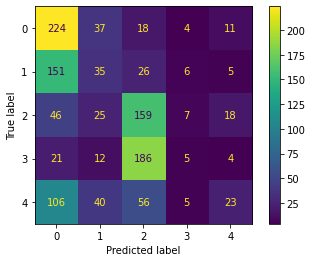

In [6]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Interpretation

In [7]:
# 1. Load Testset
dt = pd.read_csv(base_path + '/sentiment_amazon/interpretation/dev.csv')
labels = dt['label']
text = dt['text']

# 2. Load Model
tars = TARSClassifier.load(base_path + '/sentiment_twitter/model/best-model.pt')

# 3. Run Test
results = []
classes = ['The product has been reviewed as awful', 'The product has been reviewed as bad', 
           'The product has been reviewed as neutral','The product has been reviewed as good',
           'The product has been reviewed as great']

for sentence in text:
       sequence = Sentence(sentence)

       tars.predict_zero_shot(sequence, classes, multi_label = False)
       print(sequence)
       label = sequence.labels[0].value
       results.append(label)
       print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average='weighted')

2021-09-08 15:19:24,177 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/sentiment_twitter/model/best-model.pt
init TARS
Sentence: "I feed Hills Science diet to my pet because I love him and the vet tells me I should . But in all honesty , this product has what is quite certainly the worst snap-lock reseal that I have ever encountered . It is painfully difficult to get it to close properly ; and even when it is resealed as best it can be there are still gaps on the side that allow air in to oxidize the product. < br />< br /> Packaging IS important . It is no better for your pet to live on stale , oxidized food than it would be for you . Oxidized fats are also called rancid . If you imagine how healthy a rancid diet is for a human ... well , you get the idea . This is about more than just inconvenience. < br />< br /> I am posting this review for all the Hills Science diet products with this kind of packaging . If you have had the same experience as me with this pr

Sentence: "As many others have noted , these treats made our dog extremely ill . We could not figure out what was wrong at first . Eventually we realized the treats might be making him sick . We stopped feeding him happy hips and he almost immediately got better . We threw them out . Stay very far away from this product ."   [− Tokens: 62  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.0207)]}]
The product has been reviewed as awful
Sentence: "I became a vegetarian about three years ago , and before that , Teriyaki was my favorite flavor of beef jerky . So when I saw this , I immediately bought it . However , this was NOTHING like jerky . It was squishy , and tasted like bread , and the supposed " Teriyaki " flavor was nothing like any Teriyaki flavor I 've ever had . No one in my house will eat it , so I 'm returning it . If you buy , I guarantee you 'll be sorry ."   [− Tokens: 94  − Sentence-Labels: {'label': [The product has been reviewed as good (0.5115)]}

Sentence: "Was excited about this product for my ridgeback as she eats ger food in about 10 seconds ! This was nice looking and well made but , after one or two feedings , she was right back to her old speed in eating . This leaves too much room between the bump and sides so a smart pup just eats around the bump as fast as ever ."   [− Tokens: 68  − Sentence-Labels: {'label': [The product has been reviewed as good (0.0868)]}]
The product has been reviewed as good
Sentence: "I received one of these in a sampler package I had ordered of different flavored coffees from the Official Keurig.com website . I just did n't like the taste of it . I would not order this K-Cup again ."   [− Tokens: 40  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0731)]}]
The product has been reviewed as great
Sentence: "Normally I would have rated this product high as a high-protein bar with a good flavor . However , the manufacturer has loaded the bar with artificial flavor and artific

Sentence: "Though my cat is a huge a fan of all of the Dental Chews produced by greenies , my experience with this product was less than pleasant. < br /> This product did the opposite of what it set out to do . My cat violently vomited hairballs the same evening I fed him these . In fact , he could n't digest them at all and has never thrown up so much at one time . This was unusual and still has me shocked , especially for an animal that regurgitates seldom and mildly . Be careful , as I wish I had ."   [− Tokens: 105  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0485)]}]
The product has been reviewed as great
Sentence: "I bought this thinking it was a good deal , and I remember in my Keurig brewer 's sampler pack that I like the french roast cups . So , I ordered this " deal " . Do not buy this burnt , after-tasting , muddy coffee ! ! Not worth the pennies saved ."   [− Tokens: 55  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.1

Sentence: "So I lived in the Philippines for 15 years and this brand " 7D " is the BEST by far . However I 've never seen this packaging ( looks the same in the picture , but the actual pack does not have the usual transparent ' window ') . The taste is NOT what I expect from this brand . It was OK and I could not be bothered to return , but I advise against buying these ."   [− Tokens: 80  − Sentence-Labels: {'label': [The product has been reviewed as good (0.484)]}]
The product has been reviewed as good
Sentence: "I love sampler packs and trying new kinds but with this half were not even coffee instead a lot of spiced cider and hot chocolate which we do NOT drink ! ! Very unhappy. < br /> Its even more annoying than I first noticed 12 are grove square ciders or cocoas ! 4 are grove square cappunccino and only 6 are good coffees . Grove Square for me is the worst its always too sweet and its cheap in the stores . This assortment is way overpriced and so not worth it And I only recieve

Sentence: "I started using Wilton 's dyes when I was thirteen , and a set lasted me until I was twenty-nine because they were so powerful . Then I had to buy these awful new gels to replace them . I ca n't get a brown darker than my skintone -- and I 'm Irish , okay ? I get sunburned indoors . I had to put three quarters of a teaspoon in just to get a purple . And it WILL water down your frosting. < br />< br /> I 'm utterly perplexed by all these positive reviews . Did I get the dud package ? Does anybody know if I can get the old , thick paste dyes anywhere ?"   [− Tokens: 122  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.0115)]}]
The product has been reviewed as awful
Sentence: "I ordered 12 bottles . I received 11 and two of the lids were broken . To top it all off water was starting to leak through the bottom of the box . Not happy ."   [− Tokens: 36  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.016)]}]
The product has been rev

Sentence: "At home right now I have the following rooibos teas :< br />< br /> Salada Green Tea with Red Antioxidants ( strawberry-orange )< br /> Equal Exchange Wild Rooibos < br /> Port Trading Cape Rooibos < br /> Zhena 's Gypsy Red Lavender < br />< br /> These are all bagged teas . In addition , I have some loose rooibos from a local tea specialty store called Virtuous Teas. < br />< br /> Of all of these rooibos ( or rooibos-containing ) teas , the Teavana Tropica is the worst by far. < br />< br /> Firstly , it is difficult to even tell if it contains any actual rooibos ; any such flavoring is completely overwhelmed by citris . Given that the tea is actually * called * a rooibos tea , I find this completely unnacceptable. < br />< br /> It would be another matter if rooibos was simply listed as one of the ingredients . For example , the Salada green tea I mentioned does n't pretend to be a rooibos tea . " Rooibos " is listed as a constituent ( along with lycopene , anthocyanins 

Sentence: "I think the ingredients in this food speak for themselves - cheap filler & byproducts supplemented with vitamins . After doing a tiny amount of research on cat nutrition I was absolutely disgusted with myself for feeding this food to my cat for over 3 years . I am also disgusted that so many veterinarians have apparently been bought off by the Hill 's company. < br />< br /> This Science Diet formula 's first 8 ingredients :< br /> 1 - Brewers rice : Filler . Processed rice product that is missing many of the nutrients contained in whole ground rice . ( Cat 's do n't need grain , and this is the first ingredient !)< br /> 2 - Chicken By Product Meal : Parts of chicken not fit for human consumption , i.e. head , feet , bones , entrails , blood , intestines , etc. < br /> 3 - Corn Gluten Meal : Corn byproduct used as an inexpensive protein source . Many cats and dogs are allergic to corn and , again , cats are carnivores and do not need grain. < br /> 4 - Powdered Cellulose : 

Sentence: "I have just finished the last can. < br /> even though it says there is an 18 count per can , out of 3 cans only 1 had 18 . The other 2 cans had 15. < br /> I have bought this product once before & found the same problem . This is called false advertising . I have now switched to another brand ."   [− Tokens: 67  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0575)]}]
The product has been reviewed as great
Sentence: "The chocolates were melting when they arrived , but that was the least of the problems . There was nothing gourmet about the small box of chocolates we received . I 'd suggest finding a better chocolate of the month club because there must be reasonable alternatives ."   [− Tokens: 48  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.082)]}]
The product has been reviewed as awful
Sentence: "Was it packed in China ? Do n't think Salmon would remain Salmon in a Plastic Pack . Horrible Idea. < br /> I would rather go 

Sentence: "I personally purchase a lot of the 100 Calorie Snacks or the Rite Bite Snacks . I was excited to see a " cheesecake " bar in the 100 Calorie Section . However , I could NOT find these in any store near me ! So , I ordered these & anxiously awaited their arrival ... only to be VERY DISAPPOINTED !! ! These bars are super dry , almost impossible to eat without a drink nearby . They do not taste anything like cheesecake . Even the graham cracker ( Honey Maid ) that is underneath the " cheesecake " is unbelievably dry & tasteless , almost like eating sawdust ! Their is no " moisture " to the " cheesecake " layer what-so-ever , and it is grainy & gritty . I would not recommend these to anyone !! ! If you really want some cheesecake & are on a diet , I say save up some calories for the end of your week & treat yourself to a piece of the real stuff , because you will be sorely disappointed with these bars ! I only opened one of them , and made myself finish it because I cannot stand

Sentence: "I have used this formerly terrifc product for over 10 years . It was the only canned chicken sold in North America that contained no food additives . It was just chicken , water , and sea salt. < br />< br /> As of this month ( March 2011 ) new labelling and contents have appeared . The label now proclaims " Better Flavor ".< br />< br /> The product now contains 50 % more sodium - at a time when many manufacturers are either cutting back on salt content or introducing " reduced sodium " vesions of their tradtional products. < br />< br /> Worse yet , the " Better Flavor " is achieved by adding " rice starch " , " vegetable starch " ( a call to the company revealed that this is potato starch ) and " chicken broth " - which contains , among other listed ingredients , " natural flavor " ( derived from corn - an increasingly common food allergen ).< br />< br /> This product is now useless to me as I am highly sensitive to corn products . While the label still claims the produc

Sentence: "I usually have a box of granola bars in the car for after school activities , just to tide the kids over until we all get home and can have a better snack or dinner . I wanted something with less sugar so got these , thinking they would be more " wholesome " or something , or at the very least less sugary . The first time my kids unwrapped their bars , the disappointment was palpable . These things are TINY . They are also not much more than some oats ( maybe ) some rice krispy things , and itty bitty chocolate chips , all stuck together with a minimally flavorful sweet stickiness. < br />< br /> Considering that I feel like I paid a little more for these compared to other brands on the market , it made these weak little granola bars seem even more pathetic . I found a good recipe and will be making my own , with some good things included -- like nuts , seeds , and flavor. < br />< br /> Plus they come seven to a box . 7. Really ? I could only divide this box up evenly if I 

Sentence: "I have 3 dogs and all three of my dogs will not eat this dog food . I even mixed wet food in with it , hoping they would eat it , but they just pick around the dry food and leave it . I would not recommend this food . Plus , it stinks !! !"   [− Tokens: 57  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0343)]}]
The product has been reviewed as great
Sentence: "What a mess. < br />< br /> These were not packed well . No buffers. < br />< br /> Just bags tossed into a box. < br />< br /> Of the thirty bags. . SEVEN were busted open. < br /> And when we opened the box. . we had a super STICKY mess on our hands. < br />< br /> Waiting to hear from Amazon regarding this. < br />< br /> Nearly 1 / 3 of the food items were ruined / contaminated. < br />< br /> Buyer Beware !"   [− Tokens: 97  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.0286)]}]
The product has been reviewed as awful
Sentence: "My daughter has recently had to avo

Sentence: "I have been an avid fan of these cookies for years . My family went through dozens of boxes a month for our use , taking to functions as our donation , giving as gifts . They were a dark , rich , wholesome , deep taste experience . In May , 2012 , I could n't find them on the shelf in any of our normal stores . After a few weeks , they were back . I took them home and opened them and was surprised to find that the inside container was different . It used to be three rows that ran the short end of the box . Now it was two rows that ran the long end of the box . No big deal had that been all that changed . I took a cookie out and popped it in my mouth expected the same dark , rich , wholesome experience , and the cookie tasted so bad I almost threw up . It was sickly sweet . It tasted like a combination between an oreo and a health food bar . All they did was move to the middle ground where those who like health food bars wo n't like the oreo sweet taste and those who like ore

Sentence: "Dry , tasteless . No carrot flavor . No spice flavor . Go Raw has some awesome cookies . This is not one of them . Stay with the lemon , chocolate or pumpkin seed cookies. < a href =" http :// www.amazon.com / gp / product / B004YV7VE4 "> Go Raw Lemon Cookies , 3-Ounce ( Pack of 4 )</ a >"   [− Tokens: 63  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4419)]}]
The product has been reviewed as good
Sentence: "I purchased this item because I enjoyed it last year , but unable to find it in the stores this year . However , they seemed to have left the ginger flavor out this year . It does not have the kick it had last year which I enjoyed ."   [− Tokens: 50  − Sentence-Labels: {'label': [The product has been reviewed as good (0.3908)]}]
The product has been reviewed as good
Sentence: "Horrible aftertaste ! Perhaps I added too much ( 4 packs ) but it was absolutely not edible . I could n't even drink my morning coffee when I added this . I switched to Tru

Sentence: "Bought the SS525CS Light Duty Fence energizer to keep our minpins from digging out from underneath our fence . It was our last resort since they broke through every other barrier we set up . It did the trick ! We set it up at our new house so it surrounds the fence all the way around , and also set a single strand on the outside of the back of the fence , which butts up to vacant land where coyotes and stray animals run around . We did n't want coyotes coming to our yard and digging in to get at the dogs , so this was a great idea . We 've heard loose dogs get shocked out back there , and that keeps our animals safe . Well , unfortunately yesterday I heard the energizer making a louder than usual buzzing sound and knew that something was wrong . We previously had a kitten get stuck on it on the inside of our yard ( poor thing was scared half to death by the fence and the dogs !) , and bit the wire . It fried it 's poor little mouth to the wire and his legs were stuck straigh

Sentence: "The items came well packaged and in a timely manner . I am giving it 2 stars because out of the package it had dirt and what smelled like animal excrement on it . I cleaned it twice before giving it to my dog . The rack was almost completely black out of the package and after cleaning it myself it was the light brown that they normally are .... but it has still retained the bad odor . My dog is hesitant to use it because of the bad smell . I have ordered other elk racks before and just be forewarned that this company does not clean the rack before shipment . Other companies do . I did not purchase this expecting to have to clean the dirt and animal excrement off it . I 'll be purchasing my next one ( which is probably very soon since my dog wo n't touch this one ) from another company ."   [− Tokens: 162  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.0441)]}]
The product has been reviewed as neutral
Sentence: "Got these Kettle Chips Sea Salt & Vin

Sentence: "First of all I thought these were going to be Oreo sandwich cremes with peanut butter filling , covered in a fudge coating . Well , the inside is not a ' sandwich ' creme - it 's one Oreo disc with some kind of processed ( to the point of no-peanut-flavor ) cream inside , and the whole thing is then coated in fudge ( which Oreo loosely uses to mean ' chocolate ,' but I knew it was n't really going to be real fudge ) . Because there 's only one cookie inside each unit , the proportions are pretty gross - you get the medium firm texture of the outer chocolate layer , which is fine , but a single interior cookie is not enough crunch to set off the sort of lardy faux-peanut-butter layer . My son ( age 10 ) ate a bunch and probably would have eaten more , but I 'm more of a discerning customer when it comes to both chocolate and peanut butter , so I stopped after my 2 experimental ones . I do like plain Oreos , and the plain Oreos covered in the ' fudge ' - but this combo just do

Sentence: "I love coconut water . It 's so refreshing . I 've been wanting to try some of the flavored coconut waters and grabbed this when it was on sale. < br />< br /> I 'm sorry to say that I did n't like this flavor at all . It had a sour taste to me that I really disliked . I drank down one , but was not happy to think of drinking the other 11 ! sigh ... I gave the rest of them to my brother and I hope he enjoyed the flavor more than I did . I wont be getting this flavor again ."   [− Tokens: 110  − Sentence-Labels: {'label': [The product has been reviewed as bad (0.2743)]}]
The product has been reviewed as bad
Sentence: "I picked out the Valentine 's Day snacks for my kids to share with their friends in daycare for the holiday thinking they were healthier than candy . Maybe slightly , but what really bothered me was when I got home and happened to see , on the side of the box , " Made in China . " Gross ."   [− Tokens: 61  − Sentence-Labels: {'label': [The product has been revie

Sentence: "The sell by date for our pies is not until February of 2011 - but maybe they are getting a little long in the tooth . They taste a little stale to me . The mincemeat is fine , but the crusts are n't good . I 'm a little disappointed . At least they are n't rancid - but they definitely taste stale ."   [− Tokens: 65  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.0208)]}]
The product has been reviewed as awful
Sentence: "i regularly purchase the glennys ranch flavored soy crisps . they must of changed their baking process . the last 4 cases have lacked flavor , and are not as crisp . they tase the same as regular < br /> soy crisps ."   [− Tokens: 44  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0696)]}]
The product has been reviewed as great
Sentence: "I have a rescued greyhound and he was doing great on Canidae until we got our last order just last month . Now he 's a mess digestively . I 'm on an email discussion group fo

Sentence: "These suckers are yummy BUT it only came with 120 suckers , not 150 as is was supposed to ."   [− Tokens: 20  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4369)]}]
The product has been reviewed as good
Sentence: "I have been cooking with the Babycook for 6 weeks now , it works fine but not great. < br /> CONS :< br />- You can only make small amounts at the time. < br />- The blender is weak. < br />- The steamer-basket can only be filled half for most vegetables for proper steaming-result. < br /> PROS :< br />- Heats , steams , blends all in one handy tool. < br />- Easy to use. < br />- Takes up little space. < br />- Can easily be taken on a trip. < br />< br /> On some of the issues people wrote. < br />" MOLD " : Water is never completely pure so there will be buildup in the water compartment . SOLUTION : Always open the lid as soon as the cycle is done and store without the lid on . Once buildup occurs , which will happen eventually , put 2-3

Sentence: "The actual cereal is fine , but why on Earth do I need individual packets of it ? I thought I was buying the large box ( like the one I bought at Whole Foods ) . Instead it was 12 boxes containing individual packets of cereal . Obviously I should have read the description more closely , but I 'm sleep deprived . The carbon footprint on this is just insane !"   [− Tokens: 73  − Sentence-Labels: {'label': [The product has been reviewed as bad (0.0213)]}]
The product has been reviewed as bad
Sentence: "I wish they spent as much time on making the espresso taste good as they did on making green packaging ... I bought them knowing it wasnt very good simply so I can use the heck out of my nespresso , but the more I drink the more I realize how bad they taste ... They are cheap though , but I have to drink 2 to get any effect . It 's more like mid grade coffee shots rather than espresso . At this point I 'm using them simply to get rid of them . The nespresso pods taste like gold c

Sentence: "love the wolfgang puck restaurants,cookware,brand endorsed products , all his brand products / cuisine are amazing , i am a loyal fan , yet this creme caramel coffee is tasteless , no real coffee flavor , no hint of caramel or creme , it brews like a bit of steamed milk , that somewhat pasty tasteless feel on your palate . soooo dissapointed as i am such a loyal fan of all his brand , products . sadly,a waste of funds , did not return because i think food items are none refundable ."   [− Tokens: 94  − Sentence-Labels: {'label': [The product has been reviewed as good (0.0887)]}]
The product has been reviewed as good
Sentence: "Everyone raves about Pamela 's mixes , so I had high hopes . My kids seem to like them , so that 's good . Perhaps if I had eaten them fresh from the oven I would have liked them more . I ate one the next day and found it to be the usual grainy , gritty texture I associate with gluten free products . After a few chews it was like a mouthful of mud . I 

Sentence: "It is hard to review products like these because results are very dependant on each person 's physiology and are also subjective . I do n't think anyone who has said they 've had great success with this product is lying , nor do I think those that have said they 've had little success are lying . As such this is a product you have to try to see what happens for you. < br />< br /> I am not a huge consumer of energy products , but I do like to them from time to time . My standard has been Rockstar Zero Carb ( i.e. no sugar ) which is a full size energy drink . I have found that it works well and usually I do n't need to drink the entire can . The appeal of 5-hour Energy is its small size and easy storage . I do n't drink Rockstar for it 's outstanding taste , so if I can get the energy in something smaller and easier to consume , why not try ?< br />< br /> I first tried 1 / 2 a bottle of 5-hour Energy as some of the reviews made me a bit wary of how I might react . I found t

Sentence: "I want the absolute best for my dog , but this is really really expensive . Almost 8 dollars for just about 3 pieces of dehydrated meat ."   [− Tokens: 28  − Sentence-Labels: {'label': [The product has been reviewed as great (0.247)]}]
The product has been reviewed as great
Sentence: "i regularly purchase the glennys ranch flavored soy crisps . they must of changed their baking process . the last 4 cases have lacked flavor , and are not as crisp . they tase the same as regular < br /> soy crisps ."   [− Tokens: 44  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0696)]}]
The product has been reviewed as great
Sentence: "Saw this at the local market and thought I 'd give it a try since tomatoes are one of the " high pesticide " veggies . It is WAY too sweet . I will never buy it again . Should have checked the label and seen that sugar is the second ingredient !"   [− Tokens: 53  − Sentence-Labels: {'label': [The product has been reviewed as great (0.2

Sentence: "Coffee drinks are n't carbonated , so it 's odd that I would describe this drink as being " flat . " But that 's how it tasted , like a " flat " carbonated drink . Probably one of the worst coffee drinks I 've ever had in my life . I will definitely NOT be drinking more of this ."   [− Tokens: 62  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.0305)]}]
The product has been reviewed as awful
Sentence: "i do n't like it it taste like to much water in it i 'm from the island of Philippines i know the real taste of coconut juice inside so i canot compare the real taste of coconut juice sorry"   [− Tokens: 40  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0476)]}]
The product has been reviewed as great
Sentence: "In the ingredient list here or on the actual package there is no white chocolate listed . How can they call it white chocolate when there is no chocolate of any kind in the product ? It does not say chocolate flavored - 

Sentence: "I am disappointed in this product . I read a number of reviews that said it tasted like the individual canned Chai Latte , but it does not . This product is meant to be used with a commercial dispenser , maybe that makes the difference . I do not like and would like to return it ."   [− Tokens: 58  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.0208)]}]
The product has been reviewed as awful
Sentence: "When I opened the box , there was salt all over . The tops were off 2 of the shakers . Since there was no damage to the outside packaging , and there were air pillows all around the plastic shrink wrapped set of shakers , it looks like Amazon sent these out with the tops all ready off of the shakers . This is not the first time something like this has happened . Amazon , stop sending out products that are damaged ! I order a ton of stuff , because the prices are so good , and the free shipping . But I am getting a little tired of the small things here 

Sentence: "I have used and loved Crystal Light Lemonade Drink Mix for years . However , I have noticed that the taste is much weaker now . I have to cut the water down to 3 quarts instead of 4 ( 2 packets ) to get the same taste as before . The drink was already expensive and now even more so . Did the manufacturers think we would not notice ?? ? I gave 2 stars because the taste , with less water , is still very good . I am looking for a substitute because I feel cheated by the manufacturers ."   [− Tokens: 103  − Sentence-Labels: {'label': [The product has been reviewed as great (0.2148)]}]
The product has been reviewed as great
Sentence: "This pre-ground coffee 's roast date was two months old when it arrived . It tasted stale , nothing like the rich , fresh taste of the beans I 'd purchased at the coffee bar in Venice Beach . I see another reviewer complained about the same thing . What 's up Intelligentsia , using mail order to " move " your older product ? ? Well , I wo n't be dup

Sentence: "This is for Costa Rica blend . I do not like giving bad reviews but I rely on reviews myself , so I feel it important . Amazon sent me an email about their newest kcups and I was excited to try them . After looking at all choices and description , and reviews , although they were hard to find since most were for the variety pack ; I chose the Costa Rica blend . I did not want too bold a coffee and this seemed to fit the bill . After trying two brews with different strengths , this coffee just tastes " off " and like an inexpensive coffee . It actually upset my stomach causing acid , with very little consumed . Specifically , though , the taste is weak , like old coffee ; not smooth or full flavor , and the smell which I noticed immediately-had an unpleasant aroma . Not the great coffee smell we all welcome with our morning coffee . Maybe I got a bad batch but the date was ok and these are new , so I think it 's the way they are . I cannot recommend ."   [− Tokens: 199  − Sen

Sentence: "I bought this with serveral other teas because soda has gotten too expensive . We make tea by the gallon and then put them in the frig . This saves a lot of money as there are 9 people in our household . This tea does have a very nice flavor but you have to hunt for it . All-in-all I will not buy it again because it is just too weak ."   [− Tokens: 73  − Sentence-Labels: {'label': [The product has been reviewed as great (0.1131)]}]
The product has been reviewed as great
Sentence: "I have been getting two cases per month of CherryPharm ( now Cheribundi ) for the past five years . I love how healthy it is , how great it tastes and the juice really does have a positive impact for recovery. < br />< br /> When the new flavours came out I decided to try them . The Cheribundi Cacao sounded great ! What 's not to like about cherry and chocolate ?! ? However , two things have made me decide to no longer get this flavour :< br /> 1 . The Cheribundi Cacao flavour has sugar in it ! For

Sentence: "I do n't like to drink sodas because they really are n't good for you . Water can get boring , so I thought this might be good . I saw what was printed on the box , " blackberry pomegranate flavor with other natural flavor , no aspartame " . Hey , that sounds good , but further box reading shows it contains sucralose , here is one comment I found about sucralose : According to the book Sweet Deception , sucralose is made when sugar is treated with trityl chloride , acetic anhydride , hydrogen chlorine , thionyl chloride , and methanol in the presence of dimethylformamide , 4-methylmorpholine , toluene , methyl isobutyl ketone , acetic acid , benzyltriethlyammonium chloride , and sodium methoxide , making it unlike anything found in nature . If you read the fine print on the Splenda web site , it states that " although sucralose has a structure like sugar and a sugar-like taste , it is not natural . " That kind of ruins this drink mix for me . If a company ( Lipton ) wants to

Sentence: "I just purchased this tea after using Salada Decaffinated Green Tea . This is a good product . It has a fold pouch containing 4 tea bags . Take one out and you can fold down the pouch to reseal it . I have to admit that I do prefer the Salada brand over Bigelow , however . One advatage Bigelow has is it organic , Salada is not ."   [− Tokens: 70  − Sentence-Labels: {'label': [The product has been reviewed as good (0.3594)]}]
The product has been reviewed as good
Sentence: "I have used this brand of rice paper many times . It is by far my favorite . They are tasty and pretty forgiving of my clumsy efforts to roll the perfect spring roll. < br />< br /> I read with dismay how a customer found ant parts cooked into a package of them . I 've never seen this , and I hope that the customer notified the company . They make a good product , and I am sure that they would want to know about any problems ."   [− Tokens: 92  − Sentence-Labels: {'label': [The product has been reviewed as

Sentence: "I 'm happy to say that in this case a pretty package equals yummy popcorn . The freshness is just what you would hope to receive and it is easy to use . It 's a little salty if you pour in the entire seasoning packet ( I guess it is better to have too much than not enough ).< br />< br /> The popcorn has a slighly sweet taste with an acceptable amount of " old maids " . It is definately better than the popcorn I had before and I 'd purchase this again . Finally , this review is for the 4oz package ."   [− Tokens: 108  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1128)]}]
The product has been reviewed as good
Sentence: "Four HEALTHFUL Stars ! ! Izze Fortified All Natural Sparkling Blackberry Juice is a great tasting all natural juice , which is bursting with antioxidants , with a splash of sparkling water to add a little carbonation to the flavor . It is fortified with Vitamin C and B6 . Low sodium , caffein-free , and 70 % fruit juice , it 's actual

Sentence: "While I love the product , if you read the label carefully , you realize that this is product of Taiwan , not France . For those who try to avoid groceries from China / Taiwan / Hong Kong , thought I should let them know ... ."   [− Tokens: 48  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4933)]}]
The product has been reviewed as good
Sentence: "I bought this as a christmas gift for my mother who is hard to shop for . It arrived with the bowl and tree saran wrapped together and then the box was filled with styrafoam peanuts . The tree was healthy and watered when it arrived . Includes brief description of care and small bag of fertilizer . A + two months and tree is growing day by day ."   [− Tokens: 70  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.7279)]}]
The product has been reviewed as neutral
Sentence: "Overall i like it though it is little bit too sweet for me . I know there are other cereals out there with even mo

Sentence: "It is great ! It takes a long time to get hot enough to sear meat . It said that a cook book and care and maintance book were to come along but did not find it . All in pretty good product ."   [− Tokens: 44  − Sentence-Labels: {'label': [The product has been reviewed as good (0.2674)]}]
The product has been reviewed as good
Sentence: "As long as you wo n't expect to taste as regular lasagna , this is pretty good as whole wheat lasagna . A bit gummy , different texture from the regular type , of course . For the health benefit with flaxseed , I can take it to substitute regular ones occasionally . One thing to point out is that one package may not be enough for traditional lasagna recipe ."   [− Tokens: 71  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4311)]}]
The product has been reviewed as good
Sentence: "$ 95 for a 6 lb bag of cat food ? that must be one heck of a food - perhaps made with caviar ? lol"   [− Tokens: 26  − Sentence-Labels: {'label

Sentence: "The price was perfect when I bought this coffee , so had to give it a try. < br />< br /> It makes a decent cup , but I would n't rave about it. < br />< br /> Prefer the Eight O Clock brand myself , but would buy this again if it goes on sale again ."   [− Tokens: 60  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4319)]}]
The product has been reviewed as good
Sentence: "I love this product , and I wish it was easier to find in the stores . For some reason , I can never find it . Our local stores will order it , but they wo n't call and let you know it came in . By the time I get there , it 's already all been sold. < br />< br /> This is a great side dish with a piece of chicken or a green salad . I love it with vine ripened tomatoes , but my favorite way is to substitute Del Monte brand Italian Style Stewed Tomatoes . It amps up the spicy factor by quite a lot , but it 's not hot spicy , just very flavorful . Try it this way during the winter month

Sentence: "I do n't know what it is with these gluten free mixes ; they seem to be good for one thing or the other , but none of them are really all purpose . I love the waffles this mix makes , but not the pancakes . I did n't try making biscuits ( or anything other than pancakes / waffles ) with it because I loved the waffles so much ! And after the pancakes were such a disappointment , I decided to use it for what it did best . From now on , this is the mix I will use for waffles !< br />< br /> For pancakes , I have enjoyed Pamela 's ( for Bisquik-like texture , but add lots of vanilla - it makes them tastier !) . If I want denser , healthier pancakes , I mix my own mix based on a recipe in the Best Gluten-Free Family Cookbook by Donna Washburn and Heather Butt , which requires purchasing specialty flours , but it is worth it . The specialty flours are more nutritious than the Pamela 's mix , which is mostly rice ."   [− Tokens: 194  − Sentence-Labels: {'label': [The product has be

Sentence: "After making an effort to find seed wheat , and failing , I turned to the internet and got a bag of wheat. < br />< br /> this spring , I planted some in the garden , and it is currently knee high , with some lovely heads on it . I 'm looking forward to fall when I can harvest and try the second generation from this bag out. < br />< br /> I 've already ground some of what did n't get planted into flour and made some delicious whole grain strawberry shortcake ..."   [− Tokens: 98  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4016)]}]
The product has been reviewed as good
Sentence: "These cookies are soft and chewy just like you 'd expect from Chips Ahoy , but they also contain gooey fudge inside . They are definitely yummy and not too chocolatey , but I will say I expected more " gooey " from them and really inside the fudge is thicker and not really gooey at all . Overall though they definitely satisfied my chocolate craving and I love that they we

Sentence: "The description states that this tastes like a cross between ice cream + butter and I 'd have to * mostly * agree , but this is a silkier , creamier taste experience all its own . When straight out of the refrigerator it does have a texture reported in other reviews sort of like very dense whipped butter . When I had this at a cafe in England it was served a little softer , just like how the sealed jar arrives ( unrefrigerated ) which is how I use it . Ooohhhh , does it make a croissant , scone , or waffle into an event to be remembered !< br />< br /> I 'd say this is fairly true to taste of what I was served in England and for me that 's close enough . I 've tried making my own once and unless you ( a ) ; own a cow for the VERY best cream , ( b ) ; are willing to waste a lot of cream to get the curds to form , and ( c ) ; have oodles of time on your hands to tweak and get the desired result , it 's just not very cost / time / taste effective to make from scratch. < br />< 

Sentence: "We usually get a prime rib for Christmas dinner from Omaha Steaks but this year I decided to try Burgers because their hams were so good . I have got to say this prime rib roast was the best ever ! You have got to try it ! Our roast was almost 10Lbs and we fed 12 adults and 5 kids , the left-overs tasted as good the next day ! We had Philly cheese steaks with au-jus . You will not be disappointed !"   [− Tokens: 85  − Sentence-Labels: {'label': [The product has been reviewed as good (0.3497)]}]
The product has been reviewed as good
Sentence: "I was n't sure about this tea at first because I had tried several other teas that contained licorice that were just too sweet for me . However , I 'm pleasantly surprized by the light , tangy flavor of this tea . The sweetness is there , but it 's not overwhelming . I 'm not certain that it 's done much for me in relation to " detox ," but I certainly like the taste , especially after lunch . It seems to settle my stomach and help me d

Sentence: "The price is very reasonable . I really love my carbs , while not low carb , is definitely better than the empty and processsed stuff that I used to eat . If you 're looking for a low carb option that 's similar to rice , check out TVP granules . Only 3 effective carbs per serving and even easier to make than this stuff ! I 've really tried with efforts to eat good but I am not always a disciplined as I should be and , let me tell you , ALL of Bob 's Red Mill products are money well spent . Quinoa is simple to make , versatile , and packs some nice health benefits . The package it comes in does n't look like much but the seeds cook up to 3 times their size , easily . So a little goes a long way both in that sense and that it 's pretty filling too ! I use it as a side dish , in soups and stews , and I imagine that with the right ingredients it could be used for breakfast as well !"   [− Tokens: 193  − Sentence-Labels: {'label': [The product has been reviewed as bad (0.3241)]}

Sentence: "The smell and appearance of this coffee are very attractive when first opened . The bag is vacuum sealed . The coffee is very finely ground and has the soft texture of clay . The aroma is rich and delicious. < br /> Opinions will differ on taste . While I liked it , my husband was n't so keen on the flavor . I guess it depends on your feelings about chocolate. < br /> Still . . . Folgers Gourmet Selections makes a decently priced chocolate coffee that smells just as good and tastes slightly better ."   [− Tokens: 99  − Sentence-Labels: {'label': [The product has been reviewed as good (0.3671)]}]
The product has been reviewed as good
Sentence: "Stash Chamomile Herbal Tea is tea bags with dried , crushed chamomile flowers. < br />< br /> Honestly , as far as I 'm concerned , chamomile is chamomile . I suppose that when you use loose flowers you get sediment in the cup and I have seen this happen with some brands of chamomile tea bags , these do n't do that. < br />< br /> I ha

Sentence: "For them , they just like how they taste . For me , I like the fact that they have the glucosamine added to them , and that they are just very basic food , chicken and sweet potato . I would have given this 5 stars if it was made in the US . I 'll probably always , now , be somewhat suspicious of any pet foods or snacks that are made in any part in China . My older dog is very creaky and arthritic , and so far we have n't found anything that helps ease her pain , so I ca n't attest to the healing properties of the glucosamine / chondroitin in these snacks , but I figure it ca n't hurt to feed her foods that contain them ."   [− Tokens: 136  − Sentence-Labels: {'label': [The product has been reviewed as bad (0.1577)]}]
The product has been reviewed as bad
Sentence: "I had to stop drinking coffee and caffeine for health reasons . My natural doctor placed me on a strict diet with Pero as a substitute for my coffee fix . I am very pleased with it 's flavor when I use it with cre

Sentence: "Science Diet has always been known for decent quality food to feed your cat or dog . This product is no different . I have a finicky cat who will only eat certain types of dry food and this seems to be one of them . She took right to the dry without any hesitation and seems to continue to enjoy it. < br />< br /> On the downside is the size of the food . The food comes in large triangular shaped pieces that some cats may not like . Buy a small bag and try it for your pet. < br />< br /> 4 / 5 stars for the size of the food and the price tag ."   [− Tokens: 122  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.5924)]}]
The product has been reviewed as neutral
Sentence: "I was so excited to see this on Amazon - it reminded me of high school . I loved having this gum again , but it does lose its flavor pretty quickly , and it gets hard pretty fast , too ."   [− Tokens: 42  − Sentence-Labels: {'label': [The product has been reviewed as good (0.2524)]}]
T

Sentence: "I tried this food for free through BzzAgent . My dog is about a year old but VERY active , so have him on puppy food still because he 's smallish and has trouble keeping weight on . He is allergic to something , I 'm not sure if it 's environmental or food , but he did n't have a reaction to this food . This is corn-free so I 'm wondering if that 's what he 's allergic to. < br /> He did very well on it , and had nice solid stools and was n't excessively flaky or itchy . He tends to bolt his food so the very small pieces were n't that great . He would n't chew it and then ended up vomiting afterward ; I had to give him small amounts at a time . I 'd rather they had kibble size options , but I 'm being picky now. < br /> I 'm not thrilled that the second ingredient is wheat , but at least it 's not corn . Sagan seemed to do well on it . If it was less expensive than the food I have him on now ( that he also does very well on ) , I 'd have no problem using or recommending this

Sentence: "This is a review from the perspective of a non-vegan . I understand that a vegan , non-dairy cookie would taste different than any ordinary cookie . Even though I 'm not vegan , I was curious and intrigued by the healthy benefits of this all natural cookie ( 15g protein ) so I tried the chocolate chip flavor . I was impressed by the texture ( I like my cookies soft and chewy ) , but the taste was mediocre . Considering that the cookie packs a total of 408 calories , I would have to say that I would rather eat a chocolate chip cookie made with dairy products than this one . It 's a great alternative for vegans though ."   [− Tokens: 124  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.2909)]}]
The product has been reviewed as neutral
Sentence: "This gum is so similar to the gum I had as a child , it is called chiklet . I love this gum and I bought it after reading ' Kiss your Dentist Goodbye ' ( which I totally recommend ) . The only thing I do not l

Sentence: "I have a small breed service dog and his raw food diet can be a challenge when we travel . I bought this food based on the fact that it 's the closest ingredient-wise to what I 'd feed him at home . He loves this food and literally spins in circles when he hears me open the container I store it in , something he has NOT done for other foods in the past. < br />< br /> My issue with this food is that when I received the bag I noticed through the window on the back of the package that the lower third of the bag seemed to be mostly crumbs ; in transferring the upper portion of the bag to a smaller storage container I found that most of the bottom of the bag was almost " dust " . The " dust " makes my dog cough even if he eats slowly ; adding a little water to his bowl has helped with this issue. < br />< br /> Edited to add : I 've added a photo so you can see what winds up in the bowl. < br />< br /> Since this was my first bag of ZiwiPeak I 'm not sure if this is normal for t

Sentence: "I have been happy with the quality of this food as well as delivery time & speed . The cats tried tearing into this bag before their old food is gone yet . They really like this food ."   [− Tokens: 39  − Sentence-Labels: {'label': [The product has been reviewed as good (0.239)]}]
The product has been reviewed as good
Sentence: "This is a great-tasting , easy to make , low carb pasta . If it 's true that there are only 5 grams net carbs , then this is a dream come true for me . I love a good , home-made pasta dish but I avoid them because of the high carb content . With this pasta , I made a couple of my favorites and enjoyed them without feeling guilty . My only complaint , as with all low carb products , is the high price . That 's why I only gave it 4 stars instead of 5 . So unfortunately , I can only buy this once in a while . I 'm glad I found this though because I know I can have a really good pasta dish every now and then ."   [− Tokens: 138  − Sentence-Labels: {'labe

Sentence: "I purchased because it was on special , and I did read the other reviews , which were encouraging ... BUT , what a delicious surprise ! It pleased even the pickiest of coffee drinkers at a recent family event , and we are now on bag # 2 . Will soon find it necessary to order more , because it is smooth and not too light . I prefer my coffee in the medium to strong range ."   [− Tokens: 79  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1101)]}]
The product has been reviewed as good
Sentence: "I have a major sweet tooth , and my favorite dessert is chocolate . I ca n't get enough of the stuff . This made Newman 's Own Organic chocolate a natural choice for me . I was n't sure what to expect since I have n't had a lot of organic chocolate , but I really liked this bar . It was thicker and harder than I 'm used to ( that 's what she said ) , and I generally prefer my chocolate soft and creamy . However , the thickness means you get a lot in every bite . 

Sentence: "I do not love berries , not raspberries nor blueberries commonly sold in US market . Just cannot get used to their flavors . Berries are , in fact , one of the best products nature mother gives us . Goji berries are my alternatives and I would recommend it to everyone like me. < br />< br /> This sun-dried goji berries are exactly what we have in China . Unlike other products flavored towards American people 's taste , this one is not sweetened by apple juice or honey or sugar . And you can not believe how thrilled I was when I took the 1st bite. < br />< br /> You can eat it directly out of the package and it is not bad-tasting at all . Or , put some in your favorite tea . But be aware that it is not compatible with all kinds of teas . Do some research and you 'll know what kind of tea goes the best with Goji berries . You can even put it in your chicken soup . Yes , I am not kidding ! Stew the chicken with goji berries or other traditional chinese herbs . It will give you 

Sentence: "This hot chocolate is very creamy even mixed with water . A really dark , rich chocolate flavor without all the extra ingredients that you ca n't pronounce ."   [− Tokens: 29  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4483)]}]
The product has been reviewed as good
Sentence: "LOVE THIS ESPRESSO , NEVER BITTER HAS A LIGHTER TASTE BUT IS TERRIFIC TASTING,I MAKE MY CAPPICCINO EVERY MORNING.NOT A DARK BLEND ."   [− Tokens: 23  − Sentence-Labels: {'label': [The product has been reviewed as good (0.0919)]}]
The product has been reviewed as good
Sentence: "My cats both LOVE this food . I 've had varying success with about 7 different kinds of canned food . This one is a hit with both . It 's natural , mostly organic , does n't have any junk or fillers , and I have peace of mind knowing that we 're giving them high quality food from an ethical company . Since they 've been on this diet they are more active , alert and happy . Their coats are so soft and s

Sentence: "This was sent to me by a friend as I had never heard of it before . She sent two of these and two of the Channa Masala . Both were very good . I tried the Butter Chicken with chicken first and it was good . The instructions said that you could use lamb also so I tried that the second time and it was better . I have n't had good Indian food in a while , but this was so much better than going to a restaurant . We ate it at home while watching monday night football and even my son was taken back and he 's pretty picky . Good stuff !"   [− Tokens: 117  − Sentence-Labels: {'label': [The product has been reviewed as good (0.3603)]}]
The product has been reviewed as good
Sentence: "We use coconut oil instead of butter and shortening for baking and on the table. < br /> This is one of the best for texture and taste. < br /> The price is very good , and the delivery fast ."   [− Tokens: 42  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.2709)]}]
The product h

Sentence: "Once you try this coffee you will never go back to another ! Warning addictive and so satisfying no acid after burn no matter how many cups you drink . Also has more antioxidants than any other coffee according to research ."   [− Tokens: 42  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4299)]}]
The product has been reviewed as good
Sentence: "If you like Red Bull then how can you go wrong with that . I do n't drink energy drinks often but it is nice to keep some in the mini-fridge for when I need a little extra juice ."   [− Tokens: 40  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4153)]}]
The product has been reviewed as good
Sentence: "My old greyhound ( 10 yrs ) loves this stuff . I mix four cubes of it into his regular food and he comes quickly and eats all his meals eagerly . Before we added these salmon treats he skipped meals and was definitely not eager to eat when he did eat . He was losing weight slowly ."   [− T

Sentence: "I bought this espresso bean for use with my Rocket Giotto II Premium Plus espresso maker , and my Macap M4 grinder . My name is Toca , and I 'm an espresso fiend. < br />< br /> While I like this coffee and agree with a previous reviewer that it 's a " standard bearer " in my house , now they 've priced it such that I 'm more inclined to buy my espresso beans locally . I previously used " subscribe and save " to get the price at less than a twenty spot per bag . I 'll return to them when their prices return to where they were in April or I get tired of the local stuff . It 's really too bad because I love this coffee . And there may be very good reasons for the price increase , but I 'm more inclined to get adventurous with my source of coffee beans than take a 27 % price hike in the shorts. < br />< br /> If anyone can suggest a good light roast espresso bean in the northern Italian style , I 'm all ears !< br />< br /> EDIT : It looks like all coffee prices are going up , 

Sentence: "This was my first time ordering these cherries. < br /> My husband has gout , so I thought this might be a good snack to help him ward off attacks. < br />( Cherries are known gout helpers. )< br />< br /> I was n't thrilled with the price , but when it got down to a more reasonable cost ( under $ 25 ) , I < br /> ordered one to try . I was not sure I really wanted to , with all the mixed reviews of some orders < br /> being moist and great and some being nasty and dry. < br />< br /> The box we got arrived quickly and in good shape. < br /> I 'll post photos later , but wanted to get the review going. < br /> I must say that I had a much bigger box in the picture in my head. < br /> Yes , you get this box , but it is SMALL ! I know they list the weight , but it was a little < br /> hard for me to visualize four lbs of dried cherries . I 'm probably not the only one. < br />< br /> Upon opening the box , all the cherries are in one sealed blue bag . I guess the blue < br /> 

Sentence: "My family loves these chips ! We ca n't stop eating them once we start ! I did have a bad case once though . The chips were stuck in cluster balls . I called the company and they sent me coupons for free bags and % off of more bags . We have n't had any problems since. < br /> Great product !"   [− Tokens: 65  − Sentence-Labels: {'label': [The product has been reviewed as good (0.0808)]}]
The product has been reviewed as good
Sentence: "I love this tea , especially in the K-cup ! The flavor is delicate ; the citrus note from the bergamot sets it apart from regular black tea . And there is none of the mess I experience with tea bags ! I bought this to make my mother-in-law happy , but this has become my favorite evening drink ."   [− Tokens: 60  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1232)]}]
The product has been reviewed as good
Sentence: "I like these because they are not too big , so the bag lasts a little longer . My dogs love them . Price 

Sentence: "I just love the pancake mix ! It is easy to flip over on the griddle ! It takes little time to cook up pancakes when you have orthopedic issues !"   [− Tokens: 31  − Sentence-Labels: {'label': [The product has been reviewed as good (0.2524)]}]
The product has been reviewed as good
Sentence: "First and foremost , these toaster pastries taste great ! You get light , crusty pastry and impressive chocolate flavor . So if you 're worried about whether or not toaster pastries that are billed as organic and healthy can measure up favorably to the market leader , I suggest you try them - I think you 'll be pleasantly surprised. < br />< br /> It would definitely be a stretch to call these toaster pastries health food , despite the organic , low sodium , zero trans fat and vegetarian claims . But the saturated fat percentage is only 15 % of the USRDA 2,000 calorie reference diet , which is relatively low for a toaster pastry . The percent of total calories that come from fat is also 

Sentence: "I had a raging case of h.pylori . H. Pylori is a bacterial infection in the gut . I had tried the mastic gum capsules , but had no luck with those . I ordered this gum and began to chew it . The whole problem which I had been suffering from for months was gone in a few hours . This product is absolutely amazing . Do n't buy the other kinds that have sugar or sugar substitutes . This is the real deal right here , sans additives . When you chew it , it gets into your whole digestive system somehow . The capsules do n't work because the gum needs to get mixed with saliva and coat your whole digestive tract . I like to chew it a bit and then let it dry out on a plate because it is really gooey and sticks to your teeth at first ."   [− Tokens: 155  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1347)]}]
The product has been reviewed as good
Sentence: "Avid readers of my reviews may recall that me and my mother used to consume voluptuous quantities of candy

Sentence: "I love these smoothies and always get them every Thursday during lunch . I 'm pretty much addicted and want to make my own with out spending more than what I buy at the coffee shop i go to . I go there so often , the owner knows that i want " the usual " . Peach is my favorite flavor . I 've tried green apple and mango ; green apple was good but mango tasted very weird . Peach is the besttt !! ! ( in my opinion ) Never picked another ... I am sooo addicted too !! and I hope I can make money to buy a whole crate of it . xD"   [− Tokens: 118  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1684)]}]
The product has been reviewed as good
Sentence: "i have used this product about a dozen times so far since i received it. it tastes really good and very fresh . it smells fresh . the quality to me is very good . there are many recipes to make that include this mix . the imagination is the limit . i am very happy with this product ."   [− Tokens: 60  − Sentence

Sentence: "These may be one of the greatest inventions ever ! My 14 month old loves these pouches and , once opened , can easily feed himself . I keep several of these in the car / diaper bag for when we 're out and about . I was buying the Mott 's version of these , but could n't find them for order on Amazon , so I tried these . They must taste great because my son ca n't get enough of them . They are a bit smaller than the comparable Plum organics pouches , but at this price , they are a great addition to our toddler 's snack cabinet ."   [− Tokens: 114  − Sentence-Labels: {'label': [The product has been reviewed as good (0.0963)]}]
The product has been reviewed as good
Sentence: "Havent given it to my dog but if it works for the fourth of july that would be realy great"   [− Tokens: 20  − Sentence-Labels: {'label': [The product has been reviewed as awful (0.2422)]}]
The product has been reviewed as awful
Sentence: "< a href =" http :// www.amazon.com / gp / product / B007PA33NY "> 

Sentence: "My wife and I enjoy a pot of Green Chai Tea each morning . It has a great flavor . It is a little hard to find in grocery stores at the quantity that we like . Hint ... set it up as a subscription and you will pay less than most grocery stores and you will have it delivered to your door ."   [− Tokens: 64  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1392)]}]
The product has been reviewed as good
Sentence: "This is our all-time favorite tea especially for brewing a pot full and enjoying with family and friends either hot or iced . I like the fact that it is a fairly strong tea and when we add ice ( which we have done a lot of this summer ) , it does n't dilute it too much ."   [− Tokens: 59  − Sentence-Labels: {'label': [The product has been reviewed as good (0.1275)]}]
The product has been reviewed as good
Sentence: "I am always looking for something to send to my sons ( one is in college the other in the military ) . I sent these cookies along wit

Sentence: "I first sampled this beverage in May. It was an instant hit . I have subscribed to it from Amazon . Want something different from pop , tea , or plain water ? Give any of these flavors a try . In my area you can buy them in Dillons , but Amazon does n't require a trip to the store ."   [− Tokens: 62  − Sentence-Labels: {'label': [The product has been reviewed as good (0.479)]}]
The product has been reviewed as good
Sentence: "We do love this stuff , and as they say , We put that **** on everything ! But at under $ 3 a bottle at our corner grocer 's here in the US , I think we 'll stick to buying locally ... Sorry you ca n't find it in the UK ."   [− Tokens: 54  − Sentence-Labels: {'label': [The product has been reviewed as good (0.5619)]}]
The product has been reviewed as good
Sentence: "This is another item available from a variety of sources . The listed price works out to about $ 3.50 a pound from the source shown at this moment . It is a variety of taffy with reasonably 

Sentence: "I never really believed there was that much difference in types of salt until I tried this brand . A lot of cooking TV shows mentioned using kosher salt but I never though much of it . But this salt is really different than any others I 've had . I do n't know if it is the process of making kosher salt , or the raw source ingredients , or the shape of the flakes , but every other salt I 've had pales in comparison . I even thought it might be just my imagination , but I 've had people come over and after they salted something they specifically mentioned how good this salt tasted . It 's not all kosher salts , though , because I tried Morton 's kosher salt after this ran out and it had a horrible chemical aftertaste , and the flakes were n't as light and thin as these. < br />< br /> If you do n't know , kosher salt is make by evaporating water , so it 's supposed to be a more natural and unprocessed kind of salt . Maybe Morton uses some other additives or something . The fla

Sentence: "I have been having problems with my bladder . Interstital Cystitis is a chronic condition and also effects the colon . I suffer from severe constipation ( IBS ) also . I take fiber during the day and make sure I get enough in my diet . In the morning I drink a cup of Alvita Senna tea and within 1 to 1 / 2 hrs . I have elimination . This is the only thing that has worked for me . I have tried many other laxatives which do not work and bother my bladder . This product does not . I have also drank it at night with good results in the morning . Doctors have said not to use this continually because you could develop dependence . However , my condition is unbearable without it . At last my doctor agreeded that if I was going to take something daily then he suggested this tea . I highly recommend it for people with my condition or for individuals who take a lot of medications that tend to slow down the system . I have placed an order for more and will continue to use this great pro

Sentence: "We lost a different kibble ball that our 16-pound Havanese loved : < a href =" http :// www.amazon.com / gp / product / B0002DK26M "> Omega Paw Tricky Treat Ball , Large </ a > ( the small size ) . I thought I 'd try a different kibble ball as a replacement . The Buster Mini Cube is made of hard plastic and makes a lot of noise when the dog rolls it onto the linoleum kitchen floor and into chair legs , furniture , etc . It 's also a cube ( true to its name ) and gets stuck in corners . Maybe it 's because my dog first learned how to get treats out of the Omega Treat Ball , which is round and made of softer material , but he definitely did n't have as much fun with the Buster Mini Cube . He also liked to carry the Omega Treat Ball around in his mouth , and the Buster Mini Cube is too large and square for him to do so . I just purchased another Omega Treat Ball and expect it will remain his favorite kibble ball ."   [− Tokens: 196  − Sentence-Labels: {'label': [The product has

Sentence: "Not so impressed with this hummus . Then again , I 've not been positively impressed with any canned or bottled hummus I 've had . My search continues , but for " emergency hummus " to have on hand , choices are slim . I see a business opportunity for someone. < br />< br /> Despite the claim of being made in Israel , this hummos reminds me of someone talking in a " Ja'fakin " accent . Taste and ingredients do n't really add up. < br />< br /> Check out the Ja-fakin ' ingredients :< br /> Chickpeas , tehina , water . Good so far . Vegetable Oil ( Cottonseed and / or Soy ) [" what what WHAT ?"] , Dextrose , salt , " Edible Starch " ( huh ?) , Citric Acid , and " spices ".< br />< br /> Let 's break this down :< br />- No olive oil . They use literally the cheapest edible oil obtainable. < br />- Dextrose . That 's potato sugar . What 's that in there for ?< br />- " Edible " starch ? I would hope so ! Does the fact that it 's edible need to be mentioned ? Just what kind of st

Sentence: "This water purportedly contains 9.5 ph . However , the purported benefits of high pH water are not demonstrated in scientific literature , only in this company 's marketing materials . The fact is that the ideal pH level of drinking water should be between 6-8.5 . The body maintains a pH equilibrium on a constant basis that is not affected by water consumption of higher or lower pH , unless it 's consistent consumption on a regular basis . In fact , our stomachs have a naturally low pH level of about 2 , which is helpful for food digestion , and our stomachs will self-adjust to maintain this naturally low pH level. < br />< br /> Yes , it 's water , and Amazon will ship 12 bottles to you for about 2 bucks a bottle . If you do choose to get this monster shipment , also consider purchasing carbon off-sets ."   [− Tokens: 156  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.358)]}]
The product has been reviewed as neutral
Sentence: "This might be a way

Sentence: "I have a German Shepherd puppy ( 14 weeks old ) and bought the medium sized ones because I thought she would be forced to chew them and not swallow them whole . I was wrong . She chews on them until the flavoring on the outside is gone and then swallows them whole --- regurgitating it until she is able to swallow it . So now that I know that , I take them off of her when I start to hear it and throw them out . I probably should n't give it to her at all but Im hoping that eventually she will just chew them completely . I do n't want to waste the whole bag , which is pretty expensive . But technically my dogs loves getting these .....< br />< br /> On the other hand , I have an adult yellow lab that loves the large ones . She is used to chewing raw hide and pig 's ears so she just chews it right up with no problem ."   [− Tokens: 177  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4045)]}]
The product has been reviewed as good
Sentence: "I love my coff

Sentence: "This jumped-up cookie-wannabe really is taking things a little too far . McVitie 's < a href =" http :// www.amazon.com / gp / product / B000VJD5LQ "> Hobnobs </ a > are already a mite sweeter than many British biscuits and many believe that they already pander a little too much to modern American-influenced tastes ever to truly qualify as a proper biscuit . To add a coating of milk-chocolate ( which melts as soon as you try to dunk one ) to such a confection is really taking things altogether too far , producing a sickly mismatch of tastes and textures that will appeal only to the young of pallet . Or , perhaps , to the glutton. < br />< br /> Perhaps the final clue that this was never intended for a British market is to be found in the fact that McVitie have here dispensed with the modest paper wrapper of a " proper " packet of biscuits and chosen to sell these items in a plastic tube . Hmmm ..."   [− Tokens: 176  − Sentence-Labels: {'label': [The product has been reviewed

Sentence: "When I first opened this can of Gatorade Protein Recovery Shake , I was unpleasantly surprised . The most noticeable part about this drink is the consistency of the liquid is incredibly thick . The drink feels oily , or possibly even slimy in my mouth . After swallowing , the drink left a kind of chalky aftertaste in my mouth . I could taste the strawberry flavor , but the flavor is not as strong as I expected . Of course , the reason the drink feels so thick is that it has 20g of protein in every can. < br />< br /> I have not had a chance to try this drink out immediately after exercising , so I cannot give much comment to its effectiveness as a recovery method from strenuous athletic activity . However , the taste of the drink would be enough to keep me away. < br />< br /> I recently tried the Gatorade Nutritional shake , and much preferred the taste of that product to this one . If you are looking for a way to quickly recover protein after a hard work out , then this dr

Sentence: "I do n't get the hype about this stuff . Maybe the consumer reports phenomenon struck - they rated this highly a while ago , but CR does get stuff horribly wrong on a regular basis ( read the user reviews ) . I used to think 8 o-clock bean was pretty good until I started tasting premium coffees such as starbucks columbia and peet 's major dickasons , which are in a class of there own compared to this . You can get Kirkland house blend 2 lb bag for the same price at Costco , and it 's far superior to this . You can find Cameron 's organic on Amazon for not much more than 8 o-clock bean , their french roast is world 's better. < br />< br /> I simply ca n't imagine buying this when there are much better quality beans for about the same price ."   [− Tokens: 154  − Sentence-Labels: {'label': [The product has been reviewed as good (0.4166)]}]
The product has been reviewed as good
Sentence: "this is good licorice , but perhaps a bit overpriced . it was well received by my mom , a

Sentence: "The flavor is partially saved by the added sugar , but adds more proclivity to get stuck in your teeth . Got these at a steep discount & still would n't buy again at that price point ."   [− Tokens: 38  − Sentence-Labels: {'label': [The product has been reviewed as great (0.3227)]}]
The product has been reviewed as great
Sentence: "To my mind , a fine caramel should be creamy and melting . These are grainy . The flavor on these was fine , although a little sweet to my taste ."   [− Tokens: 32  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.5564)]}]
The product has been reviewed as neutral
Sentence: "I had the opportunity to digest a box of Quaker Oatmeal Squares Crunchy Oatmeal Cereal with a Hint of Brown Sugar , and the name of the product pretty much sums up whats in the box . To be honest , it is what it says it is , but not much more . The product had a good crunch and the brown sugar flavoring tasted as it was . But it struck me as sweet - may

Sentence: "My 2 year old inteligent Red Heeler had this treat out of the puzzle ball and devoured in about 25 minutes . However , my 12 year old " not that smart " Chow mix could n't get the treat out of the puzzle and licked the treat for hours , until the Red Heeler got a hold of it . So , if you have a " not so smart " dog this is a good product . But if your dog is smart it 's not worth the price ."   [− Tokens: 92  − Sentence-Labels: {'label': [The product has been reviewed as great (0.2824)]}]
The product has been reviewed as great
Sentence: "My sister tried these out with one of her dogs . She says :< br />< br /> I gave the stick a try with our small rat terrier mix , Nellie . At first I could n't figure out how to open it the bottle . It looked like you pealed the wrapper off the lid area , but it was n't coming . Then I could see the faint perforated line around the base of the cap and you twist to break that , like a salad dressing bottle . The stick itself is like a deodora

Sentence: "Took a chance on this product after reading all the positive reviews . I 'm not really a fan of this product . It was effective in terms of providing energy , but the taste was n't quite right . Since most energy drinks have similar ingredients , I think the problem might be too much Ginseng and / or Ginkgo Biloba or maybe something with the citrus aftertaste . I will try something else next time since there are so many other energy drink choices out there ."   [− Tokens: 89  − Sentence-Labels: {'label': [The product has been reviewed as great (0.0909)]}]
The product has been reviewed as great
Sentence: "At first I thought I liked it but then I got a funny taste to it . I only had one to try so maybe the second time around it would have been better . I do love the kona blend by Tully . Yum !"   [− Tokens: 46  − Sentence-Labels: {'label': [The product has been reviewed as good (0.2507)]}]
The product has been reviewed as good
Sentence: "These were ok , but when I purchased a 

Sentence: "I was suspicious of a food product with savings of $ 40 something dollars , so did some Googling . Luck Chen , the company that produced this is no longer activly producing foodstuffs . From their website :< br />< br />" Due to the decline in quality controls at our manufacturing facility in China , we regret to inform you that Luck Chen has temporarily discontinued manufacturing its product line. < br />< br /> Manufacturing goods in China has become a great challenge while at the same time trying to maintain strict quality controls. < br /> We will be moving manufacturing of our noodles line to New York State in the near future. "< br />< br /> So this stuff is just back logged product someone is trying to liquidate , ostensibly from the manufacturing facility that had such a ' decline in quality controls' the parent company decided to pull out. < br />< br /> Nuff said ?< br />< br /> It 's a shame , trying to find some easy veggie meals for quick prep ... The hunt conti

Sentence: "As a rabid , unrepentant coffee-drinker , I had to try this product . Although I love the flavor and texture of French roast coffee , it 's acidity tends to wreak havoc once inside of me . Given my ( minimum ) two-cup a day habit , coffee can be tough going , to say the least. < br />< br /> The Puroast brand delivered on the caffeine , but I found the flavor to be a bit bland , both straight and with cream . I generally like my French roast to be strong , sharp and over-powering ( so as to awaken me with a jolt and keep me fully hyped up ) , but the flip-side of this is typically very high acid content with the usual medical complaints . To achieve that same full sensory experience , I had to use a bit more of it - about 1.5 times the usual amount of grounds that I brew of typical French roast in order to achieve a similar ' kick ' from the coffee. < br />< br /> In passing , I also like to spice up my coffee with either 1 ) a little cinnamon and Kahlua ( usually during win

Sentence: "This is better than diet but falls short of brand name cola taste . I feel the cola flavor is a little " spicy " and not fruity enough . I tried a few mixin 's and now I think it is great . If it came as good as I can mix it , I would give it five stars . If you decide to try this product , get some True Lemon or Lime , True Orange , stevia packets ( with a high level , 90 % or better , of steviosides for cleaner,sweeter flavor , and a bottle of cherry snow cone syrup if you like cherry cola . I use a half packet of lemon and Orange , 1 packet of stevia , and a short squirt of cherry per liter bottle . Now the flavor falls between generic and brand name . Cheaper than using cans , but not cheaper than using two liter bottles . The calorie count is about a third of normal cola . You have to be comfortable with Splenda and Ace-K as Soda Stream uses those to offset some of the sugar ( not corn Syrup a plus ) . Thankfully no Nutrasweet / aspartame as I get terrible headaches fro

Sentence: "I 've been using 5 Hour 1-2-3 days a week for quite sometime now and have had a good experience with it . However I just came across a new energy shot that I like better called DYNAPEP Energy . It 's an energy shot that comes in a much smaller package that keeps my energy on a higher level for as much as 10 hours and at 46 years old I need all the energy I can get . It 's a lot more convenient to carry , seems to have a longer effectiveness and I seem to like it more than I do the 5 Hour ."   [− Tokens: 109  − Sentence-Labels: {'label': [The product has been reviewed as neutral (0.5436)]}]
The product has been reviewed as neutral
Sentence: "There is not much to say about water , I enjoy bottled water and always buy the packs of Dasani Bottled water from the local store . I saw this item and thought it would be nice to give something else a try . I poured me a glass of this water ( I have had it chilling in the fridge for the day ) , and tried it , it tasted OK , and the wate

Sentence: "V8 Juice : 5 stars < br /> Amazon Price : 0 stars < br />< br /> I love V8 and cannot give it less than 5 stars , but I must comment on Amazon 's ridiculous price . Paying $ 49.50 for 12 bottles of V8 simply is n't smart because you can just as easily buy this at your local store . It 's doubly idiotic because it 's the smaller 46 oz size . I bought a 64 oz bottle ( 2 QT ) from Walgreens tonight for $ 3 . I 'll do the math for you . $ 49.50 / 12 = $ 4.12 a bottle ( 9 ¢/ oz ) . Mine is 4.6 ¢/ oz . Amazon 's is twice as expensive. < br />< br /> I suppose if you are house-bound or overseas and must have a case of V8 , you could order this . For the rest of us with working feet and / or cars , we could just go down to the local grocery store or supermarket / Costco. < br />< br /> UPDATE 8 / 12 / 11 :< br /> Amazon has lowered the price , but it 's still not competitive w / Walgreens when there 's a sale . $ 3.32 / can for the smaller 46 oz size vs. my 64 oz bottles ."   [− Tok

Sentence: "I originally ordered two teas from Art of Tea - the Silver Needles and the Coconut Creme . When my package came in , they had shipped the Coconut Creme and mistakenly bundled it with this Mandarin Silk tea by accident . I contacted Amazon and they refunded the Silver Needles and told me I could " dispose of the Mandarin Silk Oolong as I saw fit . " Well , since I 'm never one to turn down tea , I chose to dispose of it by , well , drinking it. < br />< br /> This is n't a bad tea , first off . I do n't have too much experience with oolongs , but I do like the flavor of this . However , I do n't taste too much of the mandarin . It almost tastes sort of like a straight green tea , and it has a similar light green / yellow color . I drink it with a little honey. < br />< br /> All in all , it 's a decent tea . I do n't think I 'll order it again , but I 'll certainly finish off this tin ."   [− Tokens: 202  − Sentence-Labels: {'label': [The product has been reviewed as neutral 

In [8]:
print(report)

                                          precision    recall  f1-score   support

  The product has been reviewed as awful       0.26      0.23      0.24       277
    The product has been reviewed as bad       0.30      0.19      0.23       273
   The product has been reviewed as good       0.35      0.57      0.43       309
  The product has been reviewed as great       0.04      0.03      0.03       309
The product has been reviewed as neutral       0.31      0.26      0.28       273

                                accuracy                           0.26      1441
                               macro avg       0.25      0.26      0.24      1441
                            weighted avg       0.25      0.26      0.24      1441



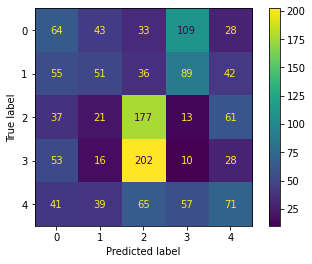

In [9]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Wordnet

In [10]:
# 1. Load Testset
dt = pd.read_csv(base_path + '/sentiment_amazon/wordnet/dev.csv')
labels = dt['label']
text = dt['text']

# 2. Load Model
tars = TARSClassifier.load(base_path + '/sentiment_twitter/model/best-model.pt')

# 3. Run Test
results = []
classes = ['one who does not side with any party in a war or dispute',
           'that which is below standard or expectations as of ethics or decency',    
           'that which is pleasing or valuable or useful',                            
           'remarkable or out of the ordinary in degree or magnitude or effect',      
           'exceptionally bad or displeasing']

for sentence in text:
       sequence = Sentence(sentence)

       tars.predict_zero_shot(sequence, classes, multi_label = False)
       print(sequence)
       label = sequence.labels[0].value
       results.append(label)
       print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average='weighted')

2021-09-08 15:20:03,579 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment2/sentiment_twitter/model/best-model.pt
init TARS
Sentence: "I would give this a zero star if I could . It 's terrible . Half the seeds did n't pop and the kernels were tough . Do not buy ."   [− Tokens: 31  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.0971)]}]
exceptionally bad or displeasing
Sentence: "Got some of this at wally world ... maybe it was old or something but it was awful .... bitter ... useless .... i threw it out ... this price here is ridiculous ... NOT RECOMONDED !!! ! One reason I did buy it was because it was not in a clear bottle , olive oil should never be in a clear bottle , but when the oil in it is lousy i guess it doesent matter . Cant blame this on china i guess :|"   [− Tokens: 86  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.026)]}]
exceptionally bad or displeasing
Sentence: "This product arrived so poorly packaged ( no inter

Sentence: "I had been feeding Blue Buffalo Wilderness wet food to my dog for about 9 months with mixed results . Two months ago , I noticed white chucks of matter that I did not recognize and had not seen before in the food . After contacting Blue Buffalo customer service , I was told that these items were bone fragments ( even though the BB website claims that they use no animal by-products ) . Last month I discovered a 2 " x 3 " piece of packing tape / heavy paper inside the can with the wet food . I did a fair amount of research online and decided to stop feeding my dog BB and only use dog food from companies that do not outsource their manufacturing ."   [− Tokens: 130  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1425)]}]
exceptionally bad or displeasing
Sentence: "It was super soggy . Not crisp like good Kimchi should be . I am a big fan of Kimchi and have eaten it regularly for nearly fifteen years . THIS IS THE WORST I have ever had . DO NOT WASTE your time

Sentence: "I first ran into this cracker at AJ 's Fine Foods ( a local grocery ) . These crackers taste great and have a generous amount of Rosemary on each cracker ( when it has n't fallen off the cracker ).< br />< br /> I recently ordered a pack of 6 boxes from Amazon and found the same problem that most of the boxes in the local grocery had. < br />< br /> Each box * should * have several large crackers the size of the box . But the large crackers do n't seem to survive shipping / handling either from Amazon or to the local grocery and so what is in the boxes are lots of cracker pieces ranging from 1 / 2 cracker size to pieces the size of a quarter . Plus , most of the rosemary has fallen off , so each box has about a tablespoon of the spices that should be on the crackers at the bottom of the bag. < br />< br /> A real shame -- I hope the company figures out a way to produce these so that they survive transport , because they are great crackers . The boxes which were shipped from 

Sentence: "7 of my 12 cats began vomiting while on this food . None of these cats have sensitive stomachs . They have never vomited on any other food . I took them off of the food and the vomiting stopped . Thinking that maybe , just maybe , it was something else making them sick , I put them back on the food , gradually . The vomiting resumed . I cannot recommend this food ."   [− Tokens: 76  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.3591)]}]
exceptionally bad or displeasing
Sentence: "The quality of this rice is terrible . You have to pick out all the black old pieces and the rice hulls . How sad that some companies , like this one , make / sell such lousy products ."   [− Tokens: 40  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1292)]}]
exceptionally bad or displeasing
Sentence: "I had fed my dogs Canidae for about 2 months before I had problems but as soon as they switched their formula I went from happy to completely unsatisfied . Both 

Sentence: "I decided to try this food as part of the Vine Program for my schnauzer . Manufacturers can say anything they want and the burden of proof is on you ( the consumer ) . In the end , what you choose to feed your dog boils down to whether the dog likes the food , the food 's nutritional content and ingredients and the track record of the dog food manufacturer. < br />< br /> The 15.5 pound bag is a good size , and there is a zip top for re-sealing the bag . I kept mine in a large plastic container for additional freshness . One of the first things I did was review the ingredient list . This product starts with ground yellow corn ( not digestible by dogs ) , followed by chicken by-product meal . We all know what chicken-by product is , so I wo n't go there , but keep in mind that this is " pet grade " meat by-product . Corn gluten and wheat / rice / soy flour are fillers or binders and offer little nutritional value . Beef tallow preserved with mixed tocopherols is an ingredient

Sentence: "Got this as a gag gift which was great for that purpose . However , I made the mistake of actually trying this . It was awful ! Still , it served its purpose . My husband no longer thinks that EVERYTHING is better with bacon ! LOL"   [− Tokens: 48  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.5567)]}]
exceptionally bad or displeasing
Sentence: "Just left packaging feedback , but upon review , the issue appears to be quality control . I ordered 2 boxes , 50 count each . In both boxes , the foil lids were not positioned correctly and the seal was not 100 % , causing coffee grounds to coat every K-Cup , the frustration free boxes and the box they were shipped in . Worse , about 20 % of the K-Cups no longer have the full amount of coffee in them . Additionally , I am not sure that these loose grounds wo n't impact the Keurig . I hope the folk at Coffee People can rectify this situation , as this is my favorite coffee , but I will not order this product again

Sentence: "I wanted to like this product ... but I hate the aftertaste and cannot get past the look of it . It seems like a good gimmick but I could n't drink it again"   [− Tokens: 34  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.4559)]}]
exceptionally bad or displeasing
Sentence: "I did not find this movie at all entertaining . I am not a huge fan of Tim Burton but I though it might make a cute Halloween movie . Did n't do it for me . It also says the " F " word and that is not a word I care to listen to or allow my children to listen to in my home . It seems that things that I found fun and entertaining in my youth are no longer fun and entertaining to me . If you are looking for a fun movie to watch as a family I would not suggest this one ."   [− Tokens: 109  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.2326)]}]
exceptionally bad or displeasing
Sentence: "This Mesquite Lime flavor is so horrible ! Please spare yourself from the disgusting 

Sentence: "First I have to say that I love Yogi tea . I love the messages on the tea bags and some flavors are remarkable ! This one , however , is horrible . I guess if you love licorice root you will like it , but I do not . I tolerate the licorice flavor in the CALM Yogi tea because it really calms me before bed and makes me feel like I am floating on a cloud , but it still manages to taste good whereas this one does not. < br />< br /> Please do buy Yogi tea and get the Green Tea Slim Life instead - terrific taste , which tastes like green tea with berries in it - a good flavor and not an artificial flavor to it . This Fasting tea has a bitter after taste , which is all licorice root . Stay clear of this flavor but do buy Yogi Tea . I feel transformed by the messages on the tea bags , as it is ; so profound !< br />< br /> Wise quotes from Yogi Tea by Yogi Bhajan < br />< br />" The universe is the stage on which you dance , guided by your heart. "< br />< br />" The purpose of lif

Sentence: "I drank this tea and within an hour needed to go to an after hours urgent care center ! I have had numerous herbal teas in my life , and really I get to this one and have an allergic reaction ? Definately not happy now that I ordered the six pack and only went through one cup and a sip of another cup before I started to have issues. ."   [− Tokens: 71  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.2663)]}]
exceptionally bad or displeasing
Sentence: "We have a dachshund mix that had a couple of seizure about a week ago . In the process of looking around for a cause , we wondered if it could be something that the dog ingested . We had been giving him the Kingdom Pet Chicken Jerky that I had bought at Costco about a month ago. < br />< br /> In looking at the bag , and I 'm embarrassed that I did n't do this when I bought the product , I noticed that there was not a clear description of the ingredients on the bag and that the product was made in China. < br 

Sentence: "Original review appears first . Please read the bottom for the updated edit. < br />< br /> I 've never given my dogs any type of rawhide product , so I ca n't tell if they like these any more or less than other similar products. < br />< br /> The size is described as mini , but they do n't look that small . I thought the sticks might be too large for them but they each happily managed to pick them up and run to their corners . I never heard a peep from either for the next two hours , when they only budged to trace spots . They managed to eat about 1 / 3 of their stick in that time , and I took them away to save the rest for another day. < br />< br /> I read the review by the other customer who was worried after his dog became ill . If my dogs get sick , I 'll update this review and the rating accordingly . But otherwise , they just spent two hours in doggy paradise. < br />< br /> UPDATE UPDATE UPDATE < br /> Unfortunately we are not as happy now . I gave the dogs the min

Sentence: "INGREDIENTS : SUGAR , GLUCOSE SYRUP SOLIDS , COCA ( PROCESSED WITH ALKALI ) , PARTIALLY HYDROGENATED VEGETABLE OIL ( MAY CONTAIN COCONUT , SOYBEAN , SUNFLOWER , PALM AND / OR CANOLA ) , NONFAT DRY MILK , MODIFIED WHEY , MALTODEXTRIN , SALT , NATURAL AND ARTIFICIAL FLAVORS , CELLULOSE GUM , SODIUM CASEINATE , CORNSTARCH , LACTOSE , DIPOTASSIUM PHOSPHATE , SUCRALOSE , MONO - AND DIGLYCERIDES , SILICON DIOXIDE , SOY LECITHIN , ARTIFICIAL COLOR. < br /> CONTAINS : MILK AND SOY < br />< br /> People , please read labels ... ."   [− Tokens: 99  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.8876)]}]
one who does not side with any party in a war or dispute
Sentence: "I have Celiac Disease and heard so much good stuff about Hemp Seeds . I purchased this 3lb . bag and was excited to try it . The first time I became very nauseous and I did not connect it to the Hemp Seeds . The next time I sprinkled it on my salad . Approximately two hours la

Sentence: "Kellogg 's cereals contain genetically modified organisms which have been patented by chemical companies that genetically engineered them in a lab and turned them into EPA registered pesticides . GMO Bt corn is an EPA registered pesticide and is one of the ingredients in Kellogg 's this products . YUK !!! ! They are also made to be resistant to high levels of a chemical called glyphosate , an herbicide , which is linked to birth defects , cancer , organ damage and inflammatory bowel disease . It also has insecticidal properties and kills off beneficial gut flora . These GMOs have not been subjected to independent , long term , peer reviewed studies to prove that they are safe . These GMOs make my family sick . We do not pour pesticides on our food and we no longer eat anything that is an EPA registered pesticide . GMOs are linked to organ damage , faulty insulin regulation and obesity , autoimmune disease , autism and a whole host of other health and environmental problems .

Sentence: "This is literally the worst salsa we have ever had . I absolutely cannot believe that GUY would allow his name to be put on it . There is NO WAY that he could think this stuff is good . Its very expensive for salsa to begin with ... and then to find out that it is horrible . UGH ! There is n't ANY spice or " hot-ness " to it at all . I do not recommend this in any way ."   [− Tokens: 84  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1179)]}]
exceptionally bad or displeasing
Sentence: "Do n't bother spending the money . Re-use the pods you already have . I 've picked up Rapid Rooters and Dyna-Gro 7-9-5 plant food from a hydroponics store , and I 've had no problems growing two batches of lettuce and herbs from my own seeds ."   [− Tokens: 48  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.7762)]}]
one who does not side with any party in a war or dispute
Sentence: "Ordered the Acana Ranchlands because of the review

Sentence: "This review will make me sound really stupid , but whatever . I do n't really care as long as people find out what 's real and can avoid my mistakes. < br />< br /> I got my wonderful little sweet Bella Bean when she was a few days shy of three years old . She had been bounced around from house to house and eating whatever was cheap . I have had cats around me my entire life , for about twenty-five years now . My mother always just fed them whatever , the kinds of food you buy in the supermarket - Friskies , Nine Lives , Kit & Kaboodle , stuff like that . And our cats were always fine , at least in terms of their eating habits . They would eat in the morning , stop when they were done , come back , and eat some more when they got hungry. < br />< br /> My housemate at the time was working for Hill 's and assured me that this was the best food ever made , so great , so on and so forth . I now know that she is an utter buffoon , but I initially trusted her judgment , which is 

Sentence: "I do not like smoked foods ( cheese , meats , etc ) . So , I took a gamble by purchasing this tea because I was looking for new and unique flavors . The description says " golden black tea with a delicate smokey flavor . " Delicate could not be farther from the truth ! This was shipped to me along with 5 more boxes of different Twinings flavors . When I opened the package , all I could smell was this - despite the fact that each bag is sealed in a paper bag , inside a plastic wrapped box ! The smoke smell was overwhelming . When I showed it to my husband , he said it smelled like tobacco . The smell was so bad , I could not even brew a cup. < br />< br /> Other reviewers obviously enjoyed this , but for me it was a complete waste of money . I could not even give the tea away ."   [− Tokens: 169  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.2528)]}]
exceptionally bad or displeasing
Sentence: "The eggnog was NOT eggnog - they should try another name , as t

Sentence: "I had an enormous hope for this " patent-pending " technology and was shocked to find that this product does n't taste like anything . I thought is was just me and tested it on several genetically different individuals . Everybody had the same perception . Several companies distribute this product under different labels. < br />< br /> I found a small maker who takes custom orders , and she made incredible chocolate sweetened only with xylitol ! Again , tested on several people . E-mail her : cocosrawchocolates at yahoo ."   [− Tokens: 93  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6684)]}]
that which is pleasing or valuable or useful
Sentence: "I used to love the smokehouse almonds but the last few cans I bought SUCKED ! Bland with little flavor . Does anyone know if they changed ingredients or recipes or something ?"   [− Tokens: 33  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.4709)]}]
exceptionally bad or displeasin

Sentence: "This review is specifically on the Ranch dressing , it may not apply to other flavors . I have to admit that I bought this on a gluten free foods web site and completely missed the zero calorie description . I do n't know what people who eat zero calorie dressing are used to , but I was expecting a tasty gluten free Ranch dressing that is at least recognizable as Ranch ( or dressing for that matter ) . I ca n't believe there are reviewers saying this stuff has flavor . Well , it does but the flavor is something like what you might get if you took a dirty dish rag , dipped it in latex paint and wrung it out on your salad : This is vile and nasty stuff ! Do n't waste your money on this one ."   [− Tokens: 144  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1058)]}]
exceptionally bad or displeasing
Sentence: "Absolutely TERRIBLE quality . DO NOT BUY . I was 100 % dissatisfied with the product ! And Amazon does NOT stand by its food sales and offer refunds ( u

Sentence: "Do not buy this item from this supplier . I cannot believed my eyes when I opened the bottle . There was a thick green stuff so I checked the label and realized that it was a mildew . Because of this , I will never buy food from Amazon again and I do a lot of shopping from Amazon ."   [− Tokens: 61  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.4012)]}]
exceptionally bad or displeasing
Sentence: "I found that Grove Square French Vanilla Cappuchino did not have any pleasant French vanilla or coffee smell . The taste was somewhat medicinal with a bitter aftertaste . Not returnable at Amazon since it is opened and after exchanging emails with the company , Sturm Foods , Inc. , I learned they do not refund customers based on " personal taste " . I would suggest staying with a brand you know and love and avoid this " bargain " item ."   [− Tokens: 83  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1804)]}]
exceptionally bad or displeasing
Se

Sentence: "The frosting did not taste very good , but it decorates well because it is stiff . I suggest you make your own if you care about taste more than appearance ."   [− Tokens: 32  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.7475)]}]
one who does not side with any party in a war or dispute
Sentence: "I 'm the biggest Oreo cookie eater you 'll ever find , so when I discovered they make sandwich cookies I was interested however the taste is significantly different from a regular cookie . The icing is the same , but the cookie part is soft and mushy like a moonpie . You ca n't really dip these in milk because they fall apart . Not recommended for those who grew up with the dippable kind of Oreo cookies ( that being most of us ) ."   [− Tokens: 87  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.3619)]}]
exceptionally bad or displeasing
Sentence: "I have had real truffles only once that I can recall , and that very old m

Sentence: "Being in Afghanistan - Dr. Pepper is hard to come by . I always have Dr. Pepper within arm 's reach back at home . Here ... not so much ... So I went on a Dr. Pepper search . $ 50 shipping for 24 / pk cans ... That was not happening , but I bought other things with the goodness of DP flavor ... icy pops ( yummy btw ) and the jerky . The jerky is just jerky ... There might be a hint of DP flavor , but it 's so light that my mind might be playing tricks on me wishing to taste it so badly. < br />< br /> Also . it IS ONLY 4oz ! just like the title says ! that 's $ 5 / oz ... I read the title then I saw the picture with three packages a little deceiving in my opinion I figured for $ 20 I was getting three 4oz packages . As far the other review saying the jerky is dry ... It 's jerky ...< br />< br /> It is not bad jerky but it does n't taste like Dr. Pepper , and it is definitely not worth $ 5 / oz . IMHO ... live and learn but the DP icy pops are pretty good :)"   [− Tokens: 22

Sentence: "I bought these because I had used pureed sweet potato when my puppy had a stomach ache , and he really liked it . However , the pieces are quite big for a small puppy , and it took him a while to chew it up . He must not have been able to chew it up small enough , though , because he later threw up and there were large pieces of the sweet potato chips in his vomit ! I would recommend these for an adult dog , or a puppy who is a better chewer and does n't have a sensitive stomach . I guess I can hold on to these till he gets bigger , or when all his adult teeth have grown in ."   [− Tokens: 129  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.5613)]}]
one who does not side with any party in a war or dispute
Sentence: "The taste is like a bitter cherry . I do n't like them but my kids do . Good be a little sweeter !"   [− Tokens: 24  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6835)]}]
that which is pl

Sentence: "I got my Aerogarden , despite the many bad reviews on the faulty pumps . I < br /> figured that surely it was n't a widespread problem . I had about a week of happiness , watching most of my plants sprout . A buzzing sound started within 10 days , but it was bearable . In about 15 days , the pump could be heard in the kitchen AND the living room . After 20 days , I had to move the Aerogarden to the only room in the house where there were no occupants most of the day - the utility room . To say it is loud is an understatement . I have called the Aerogarden help line . They told me that they had replaced the pumps with a different kind , since they were having trouble with the old ones . These new ones just were n't working out either , apparently . They would replace mine immediately . I have a black Aerogarden , but the customer service rep told me I could get a white replacement pump faster than a black one !! ! I agreed to the white pump , but now I 'm not sure I can wait 

Sentence: "Received this order promptly , but am very disappointed in it . Over half of the k cups have exploded in our Keurig . When this happens it makes a huge mess . The machine has to be totally cleaned each time . It appears that the seal at the top of the kcups is not properly attached . The ones that do survive make excellent tasting coffee , but I will not reorder them online again . Very disappointed , makes some of the best tasting coffee we have tried , but only got to drink a little of it ."   [− Tokens: 102  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.101)]}]
exceptionally bad or displeasing
Sentence: "The last bag of these I got from Amazon had a lot of hollow bisquits . It was weird ..... . they just were n't solid like they should be . I 'm going to switch to another brand of grain-free dog bisquits now as there 's no sense in paying for something I 'm not getting ( and these are expensive ! ) And if it was n't for the good packaging I 'd wonder i

Sentence: "I bought the packs after a trip to NYC -- and due to the long wait -- could not get into the restaurant . It was pretty bad . The chocolate had a weird after-taste . I would have been better off making a chocolate milk shake . In order to use up all of the packs , I am going to try to add coffee to the milk to try to mask that funny taste ."   [− Tokens: 77  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.2716)]}]
exceptionally bad or displeasing
Sentence: "Thought this was the concentrate that is good for arthuritis , it is just a plain juice !< br /> Tastes good , just not what i thought"   [− Tokens: 28  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6081)]}]
that which is pleasing or valuable or useful
Sentence: "I recently did research on kidney / renal failure as I just lost one of my male 7 year old cats due to CRF ( chronic renal failure ) . CRF is common in cats , especially male cats due to their intricate urinary sy

Sentence: "Based on the reviews and the word ' Chai ' on the container , I decided to try it ... I am disappointed ... The taste reminds me of the latte freeze you can buy at Costco ... or the taste of the Starbuck 's Bottled Frappachino 's and powdered Nescafe latte . Its really sugary and not at all spicy . It has a fake non dairy milk taste to it ... If you are hoping for a taste similar to Oregon or Tazo Chai Concentrate ... this is not the way to go ... I might drink it if I run out of Chai flavored tea bags or hot cocoa or palpable water ... but I have a feeling it will be living on my kitchen shelf for a very long time ... I tried all the variations on how to prepare it , listed on the back of the container , and none of them inspired me to ' want ' to drink the stuff ..."   [− Tokens: 169  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.0329)]}]
exceptionally bad or displeasing
Sentence: "I like compressed rawhide because my Jack Russel is a super efficient ch

Sentence: "My baby likes the mac n cheese in the jars . So , when I could n't find the jars at the store I was at , I tried these mac n cheeses thinking they were the same . They are not . She does n't like these . Maybe it is a texture issue mainly as these are much runnier than the jar kind . Looking for more mac n cheese jars ."   [− Tokens: 74  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.4465)]}]
exceptionally bad or displeasing
Sentence: "Was running low on Pace . Picked up some of this Kirland medium salsa at the Costco , because that 's what they had . It was a mistake. < br />< br /> The consistency of the salsa is alright . It is nice and chunky , but there was just something to the flavor that was way off for me . It is loaded with sugar and tastes like it. < br />< br /> This is supposed to be medium salsa ! If you want mild tomatoes and onions in a light syrup , then this is the salsa for you. < br />< br /> Threw the remainder out after one sitting . 

Sentence: "While the flavor of these is nice , they are very hard and in my thinking must be very old or poorly done for salt water taffy . Having grown up on Cape Cod , I know what the texture and consistency should be and this certainly is not it . Disappointed in this product ."   [− Tokens: 56  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.0839)]}]
exceptionally bad or displeasing
Sentence: "Taste : Almost as good as regular Jelly Belly < br />< br /> Texture : A little odd ... not as good , but tolerable < br />< br /> Laxative effect : OMG ! Ex-Lax is no match for these babies ! Clear your schedule !"   [− Tokens: 48  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6333)]}]
that which is pleasing or valuable or useful
Sentence: "I am not rating this for flavor as I tried a different one but rating this for chewability. < br /> It is a very soft gum . I did not like it as it does not have the chewability of other top rated gums ." 

Sentence: "Marley Coffee comes with no directions on the package , only the statement that it 's single serving . It does n't state what system of coffee brewing this was manufactured for . The aroma is wonderful , however , I 'd describe the coffee as mild not medium roast . I was , therefore , disappointed in the flavor . Perhaps if it was brewed in a cone system or similar , I might have had a stronger result ."   [− Tokens: 81  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.3322)]}]
exceptionally bad or displeasing
Sentence: "I Like the ThinkThin products and had good luck with a shipment of the peanut butter ones , but these brownie crunch ones arrived in poor condition . From my best guess it looks like they were stored someplace that was hot enough for their chocolate coating to melt . Each one is splotched with white , the chocolate is brittle and flakes off immediately and bears imprints of the outer wrapper , exactly as if they had melted and then re-solidi

Sentence: "I 've owned a couple of these for several years , and have had to repeatedly replace the upright support arm ( about $ 15 a pop about once a year ) . The arm has two copper-covered contacts which erode ( NOT corrode ) to the point where the copper covering entirely disappears . The company REFUSES to acknowledge this problem , so I 've left there customer pool for good , and mm spending my time and money researching far , far cheaper alternatives using good old aquarium air pumps and air stones , soda bottles and LEDs -- you can get LED grow lights now that work in regular lamps . ( I 'll probably also try a hack involving the old basins from the AG 7-pod units , but -- now that the upright arms are worthless -- using an external aquarium air pump and air stone , and a separate LED . You can find other self-contained table-top hydroponic systems for less than half the cost of these , if you do n't want to goof around with soda bottles . Yeah , the AGs are spiffy gadgets ( un

Sentence: "I bought some because I love mac and cheese , and lived off the kraft ones in college . However , I became concerned about the laundry list of chemicals kraft uses,including Yellow # 5 . This box uses annatto and beta carotene for coloring. < br />< br /> Its difficult to put in words what this taste like . On one hand its utterly bland and flavorless , yet it also leaves a weird sharp chemical like aftertaste in your mouth . I 've tried the white cheddar one as well and it had a similar taste . I 'm giving it 2 stars instead of one because I like the fact that it does not use yellow # 5 for coloring , but I do n't think I 'll be giving Annie 's pasta another chance ."   [− Tokens: 140  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5058)]}]
that which is pleasing or valuable or useful
Sentence: "This " Espresso " coffee is too weak . Tastes like regular American coffee . This is not the taste you are looking for when you buy espresso . I use i

Sentence: "Truth be told , I 'm exceptionally hard to please with water flavor enhancers . I typically think they taste way too " chemically " and often fail to taste like they intend. < br />< br /> The MIO Liquid Peach Tea is not an exception . The peach taste is absolutely all you get , and its assaulting . It is not a " day at the beach , little umbrella in your glass with some ice " memory flashback . Using the recommended dose , It is an over-powering sickly sweet peach flavor that is not very reminiscent of warm summer days , or tea in any capacity. < br />< br /> After you get over your initial shock of the extreme sweetness , you may then note the acidic aftertaste of the chemicals used to acquire the peach'y goodness . Although I recognize I may be overly critical and many may not be as judgmental as I am , for my personal palette - this tea is just too harsh. < br />< br /> I was under the impression this would be a water flavor enhancer , not a water flavor obliterator. < b

Sentence: "I will not purchase this product again . Although they are delicious , they are not made with real blueberries or fruit of any kind . The packaging is extremely misleading , showing beautiful blueberry fruit . It makes you think you are getting an actualy chocolate covered fruit , when in reality you are getting a bag full of chemicals you ca n't even pronounce . This product is extremely overpriced for the amount you get and the fakeness of the product . Big thumbs down ."   [− Tokens: 88  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.556)]}]
exceptionally bad or displeasing
Sentence: "I have tried the GF cc cookies-very dissappointed ! I followed the recipe , used real butter , baked on a cooled cookie sheet , but my cookies came out flat , thin and super sweet . I have made several different GF cookies that taste great and resemble a cookie , but this recipe is n't the one Betty Crocker ! I will have to keep making mine from scratch ! GF Brownies are a

Sentence: "I was very disappointed , I did n't think the coffee lived up to its description . I wo n't buy it again ."   [− Tokens: 24  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.0908)]}]
exceptionally bad or displeasing
Sentence: "If you 're going to give this as a gift , make sure you have your own Box ! I ordered this as a Christmas gift for a relative .... it showed up in a " Brown Paper Bag " stapled at the top !"   [− Tokens: 45  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.72)]}]
one who does not side with any party in a war or dispute
Sentence: "We opened the box to find the jelly beans sitting directly in the box . No bag , no plastic container ( as the description states )... just literally a cardboard box full of jelly beans . How clean are cardboard shipping boxes ? The box was taped on top to seal it but air , bugs could easily get through the unsealed edges . The jelly beans were good and still tasted fre

Sentence: "This is n't bad , but it 's too sweet for me . I think it 'd be good as a mixer of frozen drink though ( or frozen drink mixer !) . It is nice that it 's 100 % juice with vitamin C added . And if you do really like sweet drinks and things ( I 'm more of a bitter or sour fan ) , then you may love this . I 'd recommend it for fans of Strawberry soda who are looking for something healthier . Unless trying it as a mixer , I would n't get it again. < br />< br /> I actually ordered the Black Cherry version of this too , so we 'll see if I like that better . Oh - and for the people who said it tastes like a Jolly Rancher . I think they 're just being general . It tastes nothing like a watermelon Jolly Rancher . The strawberry flavor stands out more to me ( is there a strawberry Jolly Rancher ?).< br />< br /> Also - weird name for a soda ."   [− Tokens: 190  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5482)]}]
remarkable or o

Sentence: "I like this tea and like mint teas but this one really needs to be a little stronger . It is better with 2 tea bags but then that makes the cost even higher . I like herbal and natural teas , this is good if you like your tea a little weak , it really is a good product just expect to use more than one bag if you want a stronger taste ."   [− Tokens: 75  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.4819)]}]
that which is pleasing or valuable or useful
Sentence: "My 4 cats seem to prefer the " Whiskas Purrfectly " brand to any other wet food I 've tried . These fish flavors are not sliced ; there are big blocks of pate in each sack that I have to break up with a knife so they can eat it . My cats like this flavor set for a change , but really like the same brand in " Chicken " flavor , which is sliced . If you have trouble with it splashing when you unzip each sack , try keeping a pair of scissors by your cat food area and cutting the bags ; it

Sentence: "One reviewer fed his dog vegetables and then observed that it likes these treats . Let 's see , you are a dog and your owner feeds you broccoli and brussel sprouts and then offers you smoked and spiced meat . You think you might like really go for Bistro Beef ? Doh !< br />< br /> I , on the other hand , formed a scientific review board to test this product . This consisted of me , my two sons , a dog , Bubba , an active bug-eyed Boston Terrier , and Max , a large friendly orange cat. < br />< br /> First , we reviewed the ingredients . Sounded good to the humans what with the smoky flavor and all . My initial theory was that it was really beef jerky byproducts of some kind. < br />< br /> The humans tasted the treats and were surprised that the taste was very mild and the texture quite soft . Clearly these are not beef jerky byproducts . The smoky flavor was noticeable , but not dominating . The spices not at all forward , actualy almost absent . The beef flavor is very sub

Sentence: "The producers of this coffee did a marvelous job on the artistic packaging , but the coffee itself lacks the pizazz I 'd expect from a coffee pod . I made the coffee in more than just the coffee pod , including taking the grinds out of the pod and putting them through my own filter , but the result was still the same -- the taste was forgettable. < br />< br /> The packaging , like I said , was marvelous , but each packet had to be opened with scissors because there was no tear cut . Just a little thing , but noticeable. < br />< br /> If you like want organic coffee and you like Ethiopian beans , this is still a good option over other non-organic pods ."   [− Tokens: 135  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.4823)]}]
that which is pleasing or valuable or useful
Sentence: "It was very prompt shipping on this delicious , nutritious , yummy almost instant meal . Perfect for those who are gluten free ."   [− Tokens: 24  − Sentence-Labels

Sentence: "Our dog LOVED the edible bone , and the floppier brown rubber bone was a favorite for a long time . The floppy brown bone survied her puppy teeth with almost no damage . The white bone is really stiff and hard , almost plastic feeling , and she had no interest in it then and as she has aged , does n't like it now either . She ignores it completely , not even bothering to bury it in the backyard , which is her favorite thing to do with all her treats and toys . Maybe other dogs will like it better . 2 out of 3 bones were great !"   [− Tokens: 113  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6493)]}]
that which is pleasing or valuable or useful
Sentence: "I really like this tea , but the bags are packed too tightly . The hot water does n't get into the tea leaves in the teabag . I have n't tried yet but it will probably make a great sun tea . It 's a great price for white tea and I have a subscribe and save delivery scheduled . Prince of Peace

Sentence: "Our cat , Lucy , prefers dry cat food . We like Holistic Select because it keeps her coat shiny and very soft . This food is a bit more expensive than some other dry cat foods , but it is less processed. < br /> I ca n't tell a difference between the Chicken , Duck , Fish versions , but I have n't tasted them . Lucy likes them all ."   [− Tokens: 73  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5062)]}]
that which is pleasing or valuable or useful
Sentence: "This stuff is great ! I 've been through a couple orders now . Hyper FX plain and simply gives me that extra " kick " I need at the gym . I do n't think it does much outside of that , but that 's all I need it for ."   [− Tokens: 52  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.8316)]}]
that which is pleasing or valuable or useful
Sentence: "We have been enjoying this honey for over a year on Subscribe & Save . I love it for all of these reasons , however 

Sentence: "My dogs hate it ... I dont know if its just the flavor because my dogs dont even eat tuna fish . I am going to try the chicken next ..."   [− Tokens: 31  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1913)]}]
exceptionally bad or displeasing
Sentence: "It 's very tasty but very high in calories . I use a little in my yogart instead of a bowl of cereal ; because of the calories . The ingredients are healthy , lots of good stuff. < br /> The recommended serving size is only 1 / 3 cup and that 's 130 calories before the milk . it has 3.5g of unsaturated fat , 5g fiber but only 6g of sugar ; it 's loaded with carbs 22g and only 20g of sodium . It 's whole grains ( oats , brown rice , buckwheat,amaranth , millet , quinoa ) flax seed , cane juice , canola , molasses , cinnamon , sea salt with added vitamin E , chicory root,and it 's glutten free"   [− Tokens: 128  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.679)]}]


Sentence: "We like the Verona Coffee . We do note the name change from Bold to Dark and will see if coffee is the same. < br /> Best part is the fast regular shipping ."   [− Tokens: 35  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5967)]}]
that which is pleasing or valuable or useful
Sentence: "I 'm generally a fan of dark roast coffees , and this is one of the better K-Cups of that variety . Perhaps not as strong as Emeril 's but better than the Starbucks French Roast K-Cups . ( None of the K-Cups I 've found are as tasty as a well-made Aeropress cup , but the ease-of-use , cleanup , and ability to change varieties for each person more than make up the difference. )< br />< br /> The form factor does n't seem to have any significant disadvantage for my . This box contains 3 12-count sealed plastic bags ( each with one of those one-way air valves ) . I 've kept the " open " dozen in a Gladware tub . All 's well ."   [− Tokens: 130  − Sentence-Labels: {

Sentence: "While this form of sweetener has been around a long time , it is the most convenient to use. < br />< br /> 1 . Its shelf life is much longer than powders. < br /> 3 . It does not dry out or get stale , like powders. < br /> 4 . It is much easier to use than liquids , which often drip either too much or too little. < br /> 5 . It is much easier to carry with you than any other format. < br />< br /> Necta Sweet is a high quality product in taste and convenience ."   [− Tokens: 107  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.703)]}]
that which is pleasing or valuable or useful
Sentence: "My doctor recommended that I try Fenugreek to increase my milk supply . Within 24 hours I noticed an increase . After about a week I was able to freeze one bag of milk every other day . I am going to continue to take this supplement as I return to work to keep my supply up . I take 2 capsules 3 times a day ."   [− Tokens: 67  − Sentence-Labels: {'label': [on

Sentence: "I have never made this type of noddle before. < br /> Although I have made Brown Rice pasta before. < br /> It is easy to over-cook Rice pasta , and then its mushy. < br />< br /> I like that this is Brown Rice , which is healthier then white rice. < br /> This Peacock brown rice does not have any gluten in it,which is a real < br /> plus for people that have to eat Gluten free , as my Son does. < br />< br /> All rice pasta is Gluten Free , and All Pasta is fat and cholesterol free. < br />< br /> I soaked the pasta for a few minutes in hot water . Drain , saute in Olive Oil & Organic coconut oil . Seasoned with allot of Garlic , Herbes De Provence , Onions , sliced Crimmi Mushrooms , Red bell pepper,a little Sea Salt , Lemon Pepper , then added fresh cooked ocean Salmon. .< br /> What can I say , it was tasteful , not too dry , and very good. .< br />< br /> If anyone usually cooks white pasta , the brown rice has a different texture to it ."   [− Tokens: 209  − Sentence-L

Sentence: "Well the main thing here is that you are trading oil for starch . I found that it had a slightly funny taste at first , but the salt and vinegar flavors are true to form so its a very workable substitute for oily chips . When I eat chips I tend to eat them for the salty flavor , not the oil ."   [− Tokens: 64  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.6008)]}]
one who does not side with any party in a war or dispute
Sentence: "This is great stuff for all foods ! I wish they still sold it in stores tho . Great deal on 12 bottles too ."   [− Tokens: 25  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6258)]}]
that which is pleasing or valuable or useful
Sentence: "Although this vanilla powder is not as powerful flavor-wise as I 'd expected , I ca n't complain . It 's great for those times when extract is n't practical ."   [− Tokens: 31  − Sentence-Labels: {'label': [that which is pleasing or valuabl

Sentence: "I was afraid to try this flavor but I was surprised , they are pretty good . I put these in my healthy vending machines and they sell. < br />[...] ."   [− Tokens: 32  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.7388)]}]
that which is pleasing or valuable or useful
Sentence: "My daughter loves this KIND bar more than I do . It has too much coconut for my taste , but she loves it and trades me for other kind bars . The almond & apricot part is fine ."   [− Tokens: 40  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.564)]}]
that which is pleasing or valuable or useful
Sentence: "It tasted good , do n't know what else to compare it to as I am not much of a tea or green tea drinker , but overall a good drink ."   [− Tokens: 32  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6149)]}]
that which is pleasing or valuable or useful
Sentence: "My 5 year old loves these . She would eat 3 pouc

Sentence: "I 've read so many reviews on the many brands and varieties of K-cups ... coffee preferences are so subjective . I did like the flavor of this coffee -- bold but not bitter . As to " strength " I wish that there was more coffee in each K-cup ... I am accustomed to Starbuck 's strength , and I have to set my Keurig to medium-cup size to get the strength I need . This is not as cost-effective as -- say Jet Fuel ( but I found Jet Fuel too bitter. )< br /> If Wolfgang Puck would add more coffee to its K-cups , this would be a perfect coffee for me ."   [− Tokens: 117  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5736)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "The only carb-free reasonably tasting drink on the market . I find that drinking more than two drinks a day does not really agree with me ( I do n't feel ill , but it is clearly missing some nutrients ) ."   [− Tokens: 42  − Senten

Sentence: "They came super fast :) My hubby had to have them , I mean come on they better be good if he is buying Corn Nuts in bulk ... hahahaha cracks me up ."   [− Tokens: 34  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.5819)]}]
exceptionally bad or displeasing
Sentence: "I usually do not like instant ice tea but this is pretty good . Nice lemon taste too ."   [− Tokens: 19  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.4862)]}]
that which is pleasing or valuable or useful
Sentence: "These are pretty tasty , if you like the taste of Merlot that is . I feared that the taste would be over powering , but to my surprise it was subtle flavor that that was just right . Now I do n't think you would want to eat them all the time but for special occasions with friends it 's great , and it also makes for a nice conversation snack ."   [− Tokens: 73  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or ef

Sentence: "We stuck with the food our chihuahua puppy was getting at the pet store ( I just could n't find the right pup for adoption so went to a petstore ) . I always heard people saying that it 's not good to switch their foods. < br /> When my husband did try to buy another brand at a local grocery store,our pup did NOT want to eat it . That food basically went to waste . I gave this brand 4 stars because our pup is very vigorous , healthy and has a beautiful shiny coat . I really do believe that Nutro Ultra is giving me a healthy puppy and am very likely to continue to purchase this brand ."   [− Tokens: 123  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5716)]}]
that which is pleasing or valuable or useful
Sentence: "I really love olive tampanade and these chips brought the taste home ; you can actually see the olives . They have an artisan quality in that they are the exact opposite of processed chips that all taste the same . I munched my sample 

Sentence: "A friend of mine made this kit exactly according to the instructions , and it was pretty good . Most red wines from kits benefit from some extra ageing ( a few months ) , but this one was good from bottling day. < br />< br /> When I got the kit , I decided to do something crazy with it . In order to concentrate the flavor I decided to mix it only at four gallons instead of the instructions' suggestion of six gallons . I had heard of others doing it to five gallons instead of six , and that was well-reviewed , but I had n't heard of four gallons. < br />< br /> The gravity was extremely high , about 1.120 if I recall correctly . Since the kit comes with champagne yeast , though , I thought that they could handle it . I oxygenated the fermenting wine three times in the primary , and believe me , it needed it ! The gravity took two weeks to drop down to 1.010 , when I racked it out of the primary ( bucket ) fermentor to the secondary ( carboy ) fermentor . It 's still sitting 

Sentence: "Dog Food is one of those things that 's difficult for a human to properly review . After all , we 're not going to eat it ( let 's hope ) , and some dogs , mine included , tend to scarf down the stuff that 's least healthy for them in the long run . Put down a bowl of " Kibbles and Bits " next to " Science Diet " and my dog will go for the Kibbles and Bits , and yet we know that Science Diet is better for him . And yet , we want him to enjoy his food ... What to do , what to do ?< br />< br /> Well , we give him Beneful . Yes , it 's not the " best " dog food out there if you 're going from a pure nutrition standpoint . Our local organic food stores and even a new organic pet food store (!) have things that are far superior , but let 's face it , you 're going to pay a LOT more for that than for Beneful . Further , I know from experience that the human food there lacks in flavor and texture compared to " mass market " foods , and yes , while that 's a trade off some are will

Sentence: "Our Heeler is 12 years old , and up to now we 've always fed Nutro to her with excellent results . Lately however , with the onset of old age , she has gotten weak and listless and had to be coaxed into eating . One day I decided to try a new brand of food to see if it would at least help her appetite . I did my research and Wellness Grain-Free CORE food always came out with 10 stars . I bought a bag and immediately our dog began to eat again . I ca n't say enough good about the results of this food with our dog . She has energy again , and even though her endurance is what you 'd expect from an old dog , she is happy and eager to go on short walks . The ingredients are top of the line , and it even has a pleasant odor . It was a lifesaver for our old pooch ."   [− Tokens: 169  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.6524)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "The product i

Sentence: "I love Grove Square Cappuccino - especially the Caramel . It is wonderful to find a K-cup in yummy flavors that is not too acidy on my stomach ( like the Emeril Big Bold Easy my husband drinks ).< br /> This product is difficult to find in stores ; our Wal-Mart was constantly running out because it is so popular , so I am happy to find it on Amazon . This shipment was fast and the price is great . Thanks !"   [− Tokens: 84  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.2805)]}]
that which is pleasing or valuable or useful
Sentence: "I ordered 2 of the sample pacs sent to my sister who was expecting a large number of guests , including me . We really enjoyed trying the different coffees . There were choices to everyone 's specific tastes ."   [− Tokens: 40  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.7266)]}]
that which is pleasing or valuable or useful
Sentence: "These tortillas are good . They do not have a m

Sentence: "This cocoa powder is great for controling food cravings . I use a large teaspoon of cocoa powder and 2 grams of Stevia in hot water . It is tasty and eliminates my sweet tooth ! I ordered this in January and it was from Frontier ."   [− Tokens: 47  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.6126)]}]
exceptionally bad or displeasing
Sentence: "Best coffee pod available that fits regular pod machines . Great taste . No burn just a deep full flavor . Right price , beats all Starbucks etc . Melitta is the best ."   [− Tokens: 34  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.3689)]}]
that which is pleasing or valuable or useful
Sentence: "Amy 's Organic Fire Roasted Southwest Vegetable soup is very good -- packed with flavor , not too salty , lots of veggies ."   [− Tokens: 24  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.8162)]}]
that which is pleasing or valuable or useful
Sentence: "I orde

Sentence: "I 've used a Cuisinart Grind'n'Brew for years to achieve the full bodied flavor of fresh ground columbian beans . When Keurigs came out I found that most brands of columbian coffee kcups left me unsatisified . They were tinny and weak . I have a caffeine sensitivity and can only have 1-2 cups of regular coffee each day and then I must switch to decaf for the rest of the day . Timothy 's Decaf Columbian K-Cup is FANTASTIC ! I 'm so relieved to have finally found a full-bodied decaf coffee . I have found that the strength is perfect if brewed on the large setting of the Keurig . Thanks to Amazon I can get this at a better price than through Timothy 's website ."   [− Tokens: 129  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5205)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "Love love love this peanut butter !! ! I used to use Better than peanut butter til I found this . It has a real pea

Sentence: "This product is a good product and really good health wise for your cats . If you are looking at this product you are probably interested in feeding your cats something better . I just wanted to address some of the negative reviews of this food - many of them by people who do n't understand that all cat food is not the same . I took the time to switch my 8 year old street rescue Louie to grain-free food ( tried many brands before I arrived at BFF ) , and here are some of my observations. < br />< br /> Cost < br /> All grain free foods costs more for the same reason that grass-fed antibiotic free , free range chicken costs more per lb than a chicken nugget . It 's better for your cat ! Anyone who has a cat that 's on a farm - ever see it eating some of the corn or wheat that spills off of the truck ? Never ! That is because cats do n't eat grains . In cheap cat foods these grains are used as fillers to round out the portions and are not of any nutritional value to the cat . 

Sentence: "I 've only done this tea as a cold brew iced tea . There is no bitterness , just a smooth , refreshing , green taste . The ginger is very strong . I love ginger , so that is no problem for me . A second brew was significantly weaker , so I will stick to one brew per batch of leaves with this one ( I am able to get three quality brews from many green teas ) ."   [− Tokens: 81  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5637)]}]
that which is pleasing or valuable or useful
Sentence: "I had this for the first time recently while I was travelling in Greece . It 's delicious fruit juice made from real fruit and it 's not too sweet . it 's manufactured by the Coca-Cola company and I wish they would sell it here too . In the USA we get Hi-C which has very little real fruit juice if any and they get these fabulous fruit concotions . Not fair !"   [− Tokens: 74  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude o

Sentence: "I just found the Mueller 's on Amazon.com and did a little price shopping . Looks like with the Subscribe and Save option the pasta is only about $ 1.15 per box . This is an incredibly good deal for an everyday price on Mueller 's pasta . I really like the quality of this brand and the price with the Subscribe option ca n't be beat . It is 20 boxes , but I just used the 3-month subscribe option . We will eat 20 boxes of pasta in 3 months ( big family ) . Thanks Amazon !"   [− Tokens: 100  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.4708)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "They taste great to me , however this is the one thing my little one does not like ; go figure i ordered 10 of them . I still love plum organics meals .......... for my little one too ."   [− Tokens: 40  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.581)]}]
exceptionally bad or displeasi

Sentence: "I bought this at Central Market after trying a sample they had . Try this : 1 cup chili stew , 1 cup sour cream , 1 lb cooked chicken . Bring to a boil and serve over rice . So darned good we had it two nights in a row . Would also make a delicious enchilada sauce . I , like another reviewer , love to cook and I sometimes feel a little guilty buying jarred food , but when the kids have baseball practice etc . this will be a live-saver ."   [− Tokens: 95  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5662)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "I got this as part of their sampler pack , to see if I 'd like any of their coffees . Many of the other varieties I am not fond of , as they are much too light and beany for my taste . This one of the last ones I 've tried and really , it 's wonderful . It 's nice and rich and dark . It brews a very satisfying cup of coffee . It 's close to 

Sentence: "As our mornings are hectic , it 's great that I can grab an organic breakfast for my boys to eat on the run . They do not taste like regular " Pop-Tarts " , but we all really like them and will keep them stocked in our pantry ."   [− Tokens: 50  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6849)]}]
that which is pleasing or valuable or useful
Sentence: "Twinings English Breakfast Tea is one of the BEST cups of tea I 've had in years . I have not had any problems with tea leaves in my cup as some other reviewers mentioned ... just the perfect cup of tea every time . HIGHLY RECOMMENDED"   [− Tokens: 47  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6967)]}]
that which is pleasing or valuable or useful
Sentence: "The cats could n't lick their paws enough after eating this cat food . I highly recommend it . It looks good , smells good and according to the two boy cats I have , it tastes good ."   [− Tokens: 39  − S

Sentence: "I 've tried hundreds of green tea brands from China , Japan and Korea and US . This is the best tasting green tea ever without the dark residue , sediments and bitter taste . This is very high quality and the taste is clean & fresh . will continue to order from Amazon. ."   [− Tokens: 55  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6868)]}]
that which is pleasing or valuable or useful
Sentence: "This is a new hobby for me and it has been fun roasting my own coffee beans with < a href =" http :// www.amazon.com / gp / product / B001BLIDD8 "> Toastess TCP-388 Hot-Air Popcorn Maker </ a > . I have tried just a few deferent types but so far I think this is one of my favorite so far . I have been experimenting with roasting times leaning toward dark French roast 13.5min / sec @ 497 ° ( espresso ) . I have noticed the heavy oily residue on the bean not seen on others and a more robust aroma and taste . I will buy another bag soon I hope the price 

Sentence: "These are excellent chips . I have enjoyed them in larger bags and was happy to find these affordable smaller bags , as they are so good that I can easily eat the whole bag if I buy a big bag ! They arrived fast and very fresh . I also love that they are gluten free , so I was able to recommend them to my nephew ."   [− Tokens: 69  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.4294)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "Once a diehard bean-grinder , I 'm now a convert to Starbuck 's instant Italian roast coffee ; it makes a lovely dark , robust brew that tastes utterly real . It 's also a great way to flavor homemade ice cream . I 'm not so crazy about the milder flavor or their instant iced coffee , but this one 's a winner ."   [− Tokens: 65  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.911)]}]
that which is pleasing or valuable or useful
Senten

Sentence: "Great product . If your from the north east and moved south like me you will love being able to have access to your favorite pork roll . Does n't matter how much it cost if you love and miss a little bit of home . Surely brought me back to my hometown with every bite ."   [− Tokens: 57  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.6395)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "So light and crucnhy - very low sodium . Kinda a different taste at first - but by the second cookie / cracker - you are hooked . I 've tried the Sesame / Almod & the original. < br />< br /> However the prices on Amazon are over priced ."   [− Tokens: 52  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5712)]}]
that which is pleasing or valuable or useful
Sentence: "Wolfgang Puck coffees are great and the Creme Caramel is one of my favorites . I would recommend this coffee for p

Sentence: "I love mango and peach flavors so I was thrilled to be able to try out Mio . First of all , I loved the packaging . It comes in a small , plastic bottle with a tight top . This makes it portable ... you could tuck it into your pocket or your purse . The second thing loved about it is that you can add as much flavoring as you like . I prefer a light flavor so just a little squeeze did it for me . I drink tons of unsweetened ice tea and I can add a drop to a glass or a few drops to a pitcher . I also added a drop to a bottle of water and it was delicious . I do n't drink enough water so having the Mio flavoring will help me drink more . This liquid can be added to so many things : yogurt , seltzer , soft drinks , cocktails ... you name it . It 's economical and versatile . What more do you want ?"   [− Tokens: 180  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.436)]}]
that which is pleasing or valuable or useful
Sentence: "This is a very good , 

Sentence: "I have tried at least ten different kinds of green tea , and Numi Gunpowder Green has them all beat , hands down !! !"   [− Tokens: 25  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.4444)]}]
exceptionally bad or displeasing
Sentence: "I 'm definitely a subscriber to this tea ! The longer you brew it the better . I actually just keep it in a thermos . yum !"   [− Tokens: 28  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.7161)]}]
that which is pleasing or valuable or useful
Sentence: "I used to buy these cookies at Target but have n't seen them there in months . These are whole-grain chocolate cookies that come in handy single-serving foil pouches . Great chocolate taste,not overly sweet , and a hearty dose of fiber . The maker , LeClerc , was easy to deal with and delivery was extremely fast . I ordered Thursday morning , and the cookies were at my door Saturday morning ."   [− Tokens: 74  − Sentence-Labels: {'label': [remar

Sentence: "The Blackberry flavor is perfectly sweet and perfectly carbonated . At 8.4 fluid ounces , it 's small enough to guzzle down in just a few gulps . At 90 calories , it is a wonderful alternative to those 100 calorie snack packs of carbs since you can comfort yourself that at least this is fruit juice . The nutrition facts label says it conatins 21g of carbohydrate , 20g of which is sugar . Also has 15mg sodium , and 10 % of recommended daily allowance of vitamins C , B6 , and Niacin . Perhaps surprisingly , the Blackberry flavor is made from juice concentrates ( in order listed on can ) white grape , apple , blackberry , lemon , and raspberry . It also contains red grape juice concentrate for the color . Very tasty !"   [− Tokens: 140  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5962)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "Although the tea I originally ordered ( Winter Mint ) came

Sentence: "I have dealt with the cholesterol issue like everyone else here . I 'll do everything to avoid the Statin poison ... fish oil , olive oil , little red meat , exercise , although I 'm all of 110lbs , have to watch it , as I loose to much weight , then get grief for that !!< br />< br /> OK here we go :< br />< br /> My good ( HDL ) has always been pretty good - anywhere from < br /> 70 but down to unfortunately 57 in ' 08 but that 's still pretty good < br />< br /> 2008 much to my horror on total and LDL < br />< br /> Total Chol < br /> UP to 232 ( highest I 've ever had !)< br /> Naughty LDL < br /> UP to 157 ( highest I 've ever had !)< br /> Nice HDL < br /> UP to 57 ( NOT best I 've had / was once 70 )< br /> Tryglycerides < br /> DOWN to 92 ( Best I 've had in some time )< br /> Sweet ol ' Glucose DOWN to 86 ( best I 've had for a while )< br />< br /> So , found this BENECOL stuff ! ! I have taken it for just maybe 3 weeks or slightly under - taking 2 with 2 meals < b

Sentence: "I decided to try PB2 after hearing a couple friends talking about it . I 'm so glad I did . PB2 has a nice peanut flavor without all the fat and calories . I add it to my weight-loss shakes for a little extra flavor . It 's also good stirred into muffin or pancake mixes , or sprinkled on top of greek yogurt and eaten with a apple . I do n't really reconstitute it -- I just use it to get the peanut flavor without all the calories . Great product !"   [− Tokens: 95  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.5393)]}]
that which is pleasing or valuable or useful
Sentence: "These are by far the best instant soups I have ever had . They are a nice hot level of spicy , riddled with flavor , and super mega delicious . The noodles are chewy and moist and I am in love . If I could I would set up a life time supply . I only wish each bowl was a little bigger so I ended each slurping session just a little more full . & lt ; 3 & lt ; 3 & lt ; 3"   [− T

Sentence: "I wanted to love this coffee because it 's fair trade AND organic , but it 's just too mild for me. . not as bold as their organic blend . Great for folks who do n't want their coffee to hold up a spoon on its own !"   [− Tokens: 49  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.6092)]}]
that which is pleasing or valuable or useful
Sentence: "My wife and I retired to Panama last year and we have n't been able to find Friskies Party Mix at any of the stores here We tried other cat treats but the cats just stuck up their noses and walked away . Now I have to send away for Party Mix to make the cats happy . I just wish there would be a box with all the choices mixed in ."   [− Tokens: 73  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.4654)]}]
exceptionally bad or displeasing
Sentence: "I have heard this described as a " starter " green tea . One of its general selling points is that it has a sweet , floral flavor that sits on 

Sentence: "They taste and look exactly like Nature Valley Bars . Also note the 10-count box is 5 packages of 2 thin bars . I would rather get the Nature Valley -- they 're cheaper and taste the same ."   [− Tokens: 39  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.5881)]}]
one who does not side with any party in a war or dispute
Sentence: "the packs are definitely not that easy to use , big and bulky , they could have cut it down A LOT and been just fine. < br />< br /> the popcorn is GOOD , good quality . most of the kernels pop and are very tasty . the oil is ok , not quite theater quality , but not bad , the salt , however , is a different story all together . i does not taste good , NOT good at all . if you use the whole portion it is FAR too salty , and definitely does not taste like theater popcorn , in fact the first batch i made i was so disappointed i thought i should have just kept buying microwaveable. < br />< br /> however I 've 

Sentence: "Be sure when you order this product that you do not want the latte . It was my first order with the K-Cups and I ordered the wrong thing ."   [− Tokens: 30  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.2349)]}]
exceptionally bad or displeasing
Sentence: "I wish I had a bit more to say about this product . I used both this and the conditioner of the same line . As a result , and with apology , my reviews for these products will be very similar. < br />< br /> The scent of the shampoo is fine . It 's neither particularly outstanding nor is it bad . The scent , such as it is , is not very long lasting . The shampoo seemed to do a good job of cleaning my hair. < br />< br /> After using it , I did n't notice any particular change in my hair . It did n't seem stronger or shinier . It 's possible that I could see improvements with repeated use , but I 've used other shampoos that give a fantastic result with the first wash. < br />< br /> It simply seems to be

Sentence: "This 2-pound " Happy Birthday Tower " comes in BEAUTIFUL gold-wrapped boxes daintily tied up with a pretty ribbon and topped with a bow. < br />< br /> Here 's the deal , though : you do n't get to choose the contents . This particular collection has Smoked Almonds , Jellie Bellies , Sonoma Jack Pepper Jack Cheese , Angelina 's Butter Cookies , Dill Seasoned Sourdough Pretzel Nuggets , Licorice Petites , Raspberry Snaps , Cranberry Harvest Medley , Fleur del Sel Caramel Popcorn , Three Pepper Water Crackers , Cheese Spreader , Savory Snack Mix , Happy Birthday Bear. < br />< br /> Out of this bunch there were several I / We were n't interested in very much . Now HERE 's an idea ( because truly , the boxes / wrapping make this an ideal " gift " in a " somebody must LIKE me , because just LOOK at how pretty these gold boxes are !" kind of way. )< br />< br /> The customer needs to be able to CHOOSE the contents ( with the cost of the whole tower adjusted accordingly . ) Someon

Sentence: "The Starbucks Natural Fusions Ground Coffee Vanilla Flavor tastes bitter to me . I believe it 's because this is a darker roast than what I prefer . The first pot I made , I made like I would my normal every day coffee . It came out way too strong and way too bitter . The next pot I made I put in less coffee and it came out better , but still a little on the bitter side . I finally got so that I added 1 / 3 the amount of this coffee than I would my normal brand and it finally came out decent . Coffee is one of those things that is very individual to each person and their taste . What one person may not like , another might . If you like darker roasted coffee then this would be perfect for you . If you prefer a lighter roast , you may want to pass on this or do what I did and make it much weaker than you would your normal brand . The Vanilla flavor is ok , but I prefer another brand of Vanilla coffee ( DD are the initials ) . Overall , not horrible , but not great and if give

Sentence: "These coffee pods ae from Fair Trade farms that are committed to sustainability . The box is attractive and each of the pods is sealed in its own little packet . I used them in a Senseo pod coffee maker as well as in the generic Mr. Coffee . The coffee brewed up nicely and was a pretty dark color . Unfortunately , the coffee itself was insipid . It had weak flavor for a medium roast despite the deceptive darkness . It was not the worst coffe I 've ever had kbut not the best . In fact it was not memorable at all , on a par with the complimentary packets you get in hotel rooms . There is alot to like about this company but this brew left me cold ."   [− Tokens: 134  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1056)]}]
exceptionally bad or displeasing
Sentence: "The packaging looked nice but excessive and the actual contents were somewhat disappointing . The actual amount of tea in the individual small plastic baggies in the small bamboo box in the shredde

Sentence: "the cookies smelled good < br /> but the dogs really did not like them much < br /> they ate them but did not seem that excited about the taste < br /> i did not taste any of them myself"   [− Tokens: 42  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.572)]}]
one who does not side with any party in a war or dispute
Sentence: "I generally like anything coffee related so I thought I 'd give these a try . It does make a fairly generous amount of iced coffee , but the whole thing was just a bit too sweet for me . I tried diluting it a bit to see if that would help , but then it did n't seem strong enough after adding ice ."   [− Tokens: 65  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5415)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "My Boston Terrier eats these , but does not appear to enjoy them any more than Milkbones . They are very hard and 

Sentence: "I have tried a few different flavors of the Kind bars . I thought that the Nut Delight was just okay . I think it 's because I 'm not extremely fond of brazil nuts ."   [− Tokens: 36  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1803)]}]
exceptionally bad or displeasing
Sentence: "After reading all the reviews I bought the 5 # bag with free shipping . It took over a week to get my order . I did so much want to like this coffee . My impressions are that it pulled a nice looking shot with a rich crema and good body . To me the coffee looks and tastes over-roasted . There is no discernable after taste lingering on the palate the way a good espresso does . I am only on day 2 of this bean . I froze most of it in tightly sealed mason jars and vacuum bags . The coffee has no fresh aroma and I am wondering if I received a fresh shipment . If not , their loss . I expected better than this , even considering the low cost . I hope it makes a decent drip coffee . If

Sentence: "The ingredients are great ... Its a very hard to eat finger food . There are such small seeds and crumbles , that you should really eat it with a spoon . So I put some in a bowl and put milk on it .... good idea , but whole almonds are not easy to chew with your cereal , so that option was out. < br /> This is meant for a granolla bar format or more uniform size ingredients . sunflower seeds and almonds do not go well together ."   [− Tokens: 92  − Sentence-Labels: {'label': [one who does not side with any party in a war or dispute (0.5391)]}]
one who does not side with any party in a war or dispute
Sentence: "These cookies may be " wheat free " , but they are made from Barley Flour which is NOT acceptable for Celiac folks on a gluten free diet . They came up on my Gluten Free Cookie search and I almost ordered them before reading the ingredients . Please note that I have not tried the cookies since they are not gluten free ; therefore my rating is not indicative of the tast

Sentence: "I was n't really sure what to expect here . I 'm an avid listener of the Joe Rogan podcast so I 've had this product marketed to me for some time . I decided to purchase this because there are no places in town that sell coconut water . My first impression was there was n't very much taste at all , and what was there did n't leave me wanting more . I 'm sure this is one of those acquired tastes things , and if you like it than this is probably for you . The case with no dents what so ever ."   [− Tokens: 107  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5515)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "I ordered these seeds to grow for my animals . The packaged arrived in terrible shape with seeds spilling out everywhere . I am not sure how much volume was lost on the trip ( I did not weigh it ).< br />< br /> I did germinate the seeds as directed - which was very easy . The germinati

Sentence: "I ordered this product because it was provided complimentary in a hotel that I stayed at . The green tea and genmaicha is the one that I like best but it would be even better if the toasted flavor was stronger . For the price , there are better teas available ."   [− Tokens: 52  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.4968)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "These are super delicious , and I really like the attempt to be more wholesome . But kind of a rip-off , and mine all came melted and reformed into a giant ball ! ! Gross ... the canola oil is more noticeable like that"   [− Tokens: 45  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.7065)]}]
that which is pleasing or valuable or useful
Sentence: "I tried this on my mom 's dog while he went through his resume of tricks , but since his mouth is bigger than the Lickety Stik he kept trying 

Sentence: "So my pup is smarter than the average ... Pup . And she figured out this thing in less than an hour . I literally had just put it together and gave it to her new and when I got back home an hour later she already had one side out , and was working on the second already . To her credit she did n't need to shred the silicone mold to get the end treat out , but none the less , this should n't be bought as a stimulation toy ."   [− Tokens: 94  − Sentence-Labels: {'label': [remarkable or out of the ordinary in degree or magnitude or effect (0.5756)]}]
remarkable or out of the ordinary in degree or magnitude or effect
Sentence: "This product is fine . It 's not that I did n't like it , but it did n't taste much like a mojito . It was n't bad , but there are so many Crystal Light flavors that I like better , the cherry pomegranate , the lemonade , the white grape , the raspberry . This one just did n't have enough of a punch of flavor to be really refreshing . I try to drink at lea

Sentence: "I ordered a 3 pack and it arrived crushed. < br /> Not the box it came in , but the cans themselves . Looked like some big trucker sat down and ate his lunch on them . Anyway , so they were crushed so bad that the cans were breached . And there 's no way I 'm about to do a taste test on it to figure out what happened. < br /> So Amazon does n't do returns on food products , but as the item must have been damaged , before it was shipped ( due to the box it came in being un-satupon ) and not during . They kindly replaced it without any hassles . My replacement was just fine and the squirrels decided they were n't as fussy as me and loved the milo I left for them ."   [− Tokens: 146  − Sentence-Labels: {'label': [exceptionally bad or displeasing (0.1369)]}]
exceptionally bad or displeasing
Sentence: "As people have pointed out , this is really more soup than it is chili . I 've always considered Chili to be more like stew . Essentially , thick . This is very much watery . You c

Sentence: "These crackers are delicious . They are a bit sweeter than I hoped for , but still , really tasty and crunchy . I try to wait until they get on sale to buy them - they are quite expensive ."   [− Tokens: 41  − Sentence-Labels: {'label': [that which is pleasing or valuable or useful (0.7922)]}]
that which is pleasing or valuable or useful
Sentence: "Before I largely stopped drinking energy drinks , these were two of the products i drank a lot of. < br />< br /> Overall pros : cheaper than redbull < br /> Overall cons : still an expensive habit < br />< br /> BLUE CAN , 4 stars :< br />< br /> Pros :< br /> Interesting / good taste . It has a very , very fruity taste , which is refreshing compared to a lot of other energy drinks , but could kind of become too sweet / overpowering when I drank too many of these. < br />< br /> Cons :< br /> Compared to other energy drinks , I do not think that this goes well with alcohol ( vodka ) at all . So for normal usage , it 's a solid dr

Sentence: "I bought the medium ball for my 5 year old lab mix as a Christmas gift . She 's a hard core chewer so I was looking for something that would not be destroyed in one day ... or in 10 minutes . She was happy to get it and plopped herself on the floor and starting chewing on the treats . It took her only 5 minutes to pop one treat out and start going to town on it . Dang , so much for the challenge . Maybe she was just lucky is what I thought , so I put the treat back in the ball and went to the bathroom to wash my hands and came back in under a minute or two and the treat was out yet again . So now I 'm just letting her gnaw at the one treat which she 's been at for over 15 minutes . I 'm going to try buying the everlocking treats for the ball next to see if they 're more of a challenge . But if that does n't prove to last longer than 30 minutes or longer I 'm not sure the whole product is worth it . For how easy the treats pop out and how expensive they are to purchase it mig

Sentence: "The Switch Orange Tangerine soda is an attempt to made a fruit soda with real fruit juice , real fruit flavor , and no added sugar . They have mostly succeeded . In the glass , the Switch looks like juice . It is lightly but distinctly carbonated and easy to drink . The orange and tangerine flavors are true - none of the " burn " of fake orange flavor . The hit of tangerine is really nice and I greatly enjoyed the flavor . My problem with the Switch was that it was too sweet for my taste . I was surprised at the how sweet it was given the advertised " no added sugar " . The ingredient list mentions grape and apple juice concentrates . That 's how they get the sugars in without adding sugar . Fruit juice concentrates are loaded with natural fruit sugars . The nutritional label tells the story : the 8.3 oz can has 34 grams of sugar ! That 's more than Cocoa Cola ( 27 grams per 8 oz ) . Bottom line - this is just too sweet for me . It 's too bad because the flavors are awesome 

In [11]:
print(report)

                                                                      precision    recall  f1-score   support

                                    exceptionally bad or displeasing       0.37      0.79      0.50       275
            one who does not side with any party in a war or dispute       0.26      0.15      0.19       248
  remarkable or out of the ordinary in degree or magnitude or effect       0.40      0.27      0.33       295
that which is below standard or expectations as of ethics or decency       0.20      0.01      0.01       278
                        that which is pleasing or valuable or useful       0.31      0.49      0.38       265

                                                            accuracy                           0.34      1361
                                                           macro avg       0.31      0.34      0.28      1361
                                                        weighted avg       0.31      0.34      0.28      1361



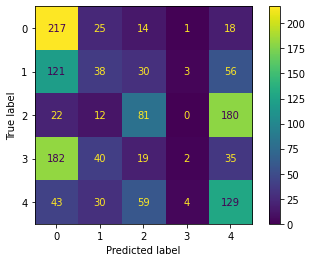

In [12]:
cm_display = ConfusionMatrixDisplay(cm).plot()